# Language detection and preprocessing

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Read-initially-preprocessed-data" data-toc-modified-id="Read-initially-preprocessed-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read initially preprocessed data</a></span></li></ul></li><li><span><a href="#Detect-languages" data-toc-modified-id="Detect-languages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Detect languages</a></span><ul class="toc-item"><li><span><a href="#Detect-languages-used-in-each-review-and-return-one-with-the-highest-probability" data-toc-modified-id="Detect-languages-used-in-each-review-and-return-one-with-the-highest-probability-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Detect languages used in each review and return one with the highest probability</a></span></li><li><span><a href="#Extract-language-with-probability-higher-than-90%-otherwise-return-None" data-toc-modified-id="Extract-language-with-probability-higher-than-90%-otherwise-return-None-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Extract language with probability higher than 90% otherwise return None</a></span></li><li><span><a href="#Find-the-most-common-languages" data-toc-modified-id="Find-the-most-common-languages-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Find the most common languages</a></span></li><li><span><a href="#Number-of-English-reviews" data-toc-modified-id="Number-of-English-reviews-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Number of English reviews</a></span></li></ul></li><li><span><a href="#Extract-and-save-English-and-non-English-reviews-for-adoption-analysis" data-toc-modified-id="Extract-and-save-English-and-non-English-reviews-for-adoption-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extract and save English and non English reviews for adoption analysis</a></span></li><li><span><a href="#Preprocess-English-reviews-for-sentiment-analysis-and-topic-detection" data-toc-modified-id="Preprocess-English-reviews-for-sentiment-analysis-and-topic-detection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocess English reviews for sentiment analysis and topic detection</a></span><ul class="toc-item"><li><span><a href="#Remove-part-of-the-review-with-no-English-characters" data-toc-modified-id="Remove-part-of-the-review-with-no-English-characters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Remove part of the review with no English characters</a></span></li><li><span><a href="#Expand-contractions" data-toc-modified-id="Expand-contractions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Expand contractions</a></span></li><li><span><a href="#Clean-reviews,-remove-punctuations-and-numbers" data-toc-modified-id="Clean-reviews,-remove-punctuations-and-numbers-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Clean reviews, remove punctuations and numbers</a></span></li><li><span><a href="#Count-number-of-words-in-reviews" data-toc-modified-id="Count-number-of-words-in-reviews-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Count number of words in reviews</a></span></li><li><span><a href="#Plot-reviews-word-count-distribution" data-toc-modified-id="Plot-reviews-word-count-distribution-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Plot reviews word count distribution</a></span></li><li><span><a href="#Plot-reviews-word-count-distribution-in-each-city" data-toc-modified-id="Plot-reviews-word-count-distribution-in-each-city-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Plot reviews word count distribution in each city</a></span></li><li><span><a href="#Count-number-of-reviews-with-'review_word_count'-below-2.5%ile-and-above-97.5%ile" data-toc-modified-id="Count-number-of-reviews-with-'review_word_count'-below-2.5%ile-and-above-97.5%ile-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Count number of reviews with 'review_word_count' below 2.5%ile and above 97.5%ile</a></span></li><li><span><a href="#Extract-'year'-from-'date'-column" data-toc-modified-id="Extract-'year'-from-'date'-column-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Extract 'year' from 'date' column</a></span></li><li><span><a href="#Statistics-for-reviews-word-count-by-year" data-toc-modified-id="Statistics-for-reviews-word-count-by-year-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Statistics for reviews word count by year</a></span></li><li><span><a href="#Plot-reviews-count-by-year" data-toc-modified-id="Plot-reviews-count-by-year-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Plot reviews count by year</a></span></li><li><span><a href="#Plot-reviews-count-by-city-and-year" data-toc-modified-id="Plot-reviews-count-by-city-and-year-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Plot reviews count by city and year</a></span></li><li><span><a href="#Plot-mean-reviews-word-count-by-year-with-95%-confidence-interval-(CI)" data-toc-modified-id="Plot-mean-reviews-word-count-by-year-with-95%-confidence-interval-(CI)-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Plot mean reviews word count by year with 95% confidence interval (CI)</a></span></li><li><span><a href="#Statistics-reviews-word-count-by-city" data-toc-modified-id="Statistics-reviews-word-count-by-city-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>Statistics reviews word count by city</a></span></li><li><span><a href="#Plot-mean-reviews-word-count-by-city-with-95%-confidence-interval-(CI)" data-toc-modified-id="Plot-mean-reviews-word-count-by-city-with-95%-confidence-interval-(CI)-4.14"><span class="toc-item-num">4.14&nbsp;&nbsp;</span>Plot mean reviews word count by city with 95% confidence interval (CI)</a></span></li><li><span><a href="#Statistics-reviews-word-count-by-city-and-year" data-toc-modified-id="Statistics-reviews-word-count-by-city-and-year-4.15"><span class="toc-item-num">4.15&nbsp;&nbsp;</span>Statistics reviews word count by city and year</a></span></li><li><span><a href="#Plot-mean-reviews-word-count-by-city-and-year-with-95%-confidence-interval-(CI)" data-toc-modified-id="Plot-mean-reviews-word-count-by-city-and-year-with-95%-confidence-interval-(CI)-4.16"><span class="toc-item-num">4.16&nbsp;&nbsp;</span>Plot mean reviews word count by city and year with 95% confidence interval (CI)</a></span></li><li><span><a href="#List-of-comments-with-word-count-between-4-and-8" data-toc-modified-id="List-of-comments-with-word-count-between-4-and-8-4.17"><span class="toc-item-num">4.17&nbsp;&nbsp;</span>List of comments with word count between 4 and 8</a></span></li><li><span><a href="#Count-number-of-reviews-with-'review_word_count'-below-8-words" data-toc-modified-id="Count-number-of-reviews-with-'review_word_count'-below-8-words-4.18"><span class="toc-item-num">4.18&nbsp;&nbsp;</span>Count number of reviews with 'review_word_count' below 8 words</a></span></li><li><span><a href="#Remove-too-short-(<8-words)-and-too-long-reviews-(>97.5%ile)" data-toc-modified-id="Remove-too-short-(<8-words)-and-too-long-reviews-(>97.5%ile)-4.19"><span class="toc-item-num">4.19&nbsp;&nbsp;</span>Remove too short (&lt;8 words) and too long reviews (&gt;97.5%ile)</a></span></li></ul></li></ul></div>

## Setup

In [1]:
import numpy as np
import pandas as pd
from langdetect import detect_langs

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string
import unicodedata
import datetime
import contractions

import warnings
warnings.filterwarnings('ignore')

In [2]:
def set_plot_styles(styles):
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.style.use(styles)
    
set_plot_styles(['mplstyle.config'])
color = sns.color_palette('tab20')

### Read initially preprocessed data

In [3]:
western_df = pd.read_pickle('western_df.pkl')
non_western_df = pd.read_pickle('non_western_df.pkl')

## Detect languages

### Detect languages used in each review and return one with the highest probability

In [5]:
def detect_top_language(text):
        try:
            top_language = detect_langs(text)[0]
            
            return top_language
        
        except Exception as e:
            print(text + ':' + str(e))
                  
            return None

In [6]:
western_df['top_language'] = western_df['comments'].apply(detect_top_language)

KeyboardInterrupt: 

In [ ]:
non_western_df['top_language'] = non_western_df['comments'].apply(detect_top_language)

In [6]:
#western_df.to_pickle('western_df_top_language.pkl')

In [7]:
#non_western_df.to_pickle('non_western_df_top_language.pkl')

### Extract language with probability higher than 90% otherwise return None

In [78]:
western_df = pd.read_pickle('western_df_top_language.pkl')

In [79]:
non_western_df = pd.read_pickle('non_western_df_top_language.pkl')

In [80]:
def extract_language(top_language):
    if top_language is None:
        return None
    
    prob = top_language.prob
    lang = top_language.lang

    if prob > 0.9:
        return lang
        
    return None 

In [81]:
def extract_probability(top_language):
    if top_language is None:
        return None
    
    prob = top_language.prob
        
    return prob

In [82]:
western_df['language'] = western_df.top_language.apply(extract_language)
western_df['language_probability'] = western_df.top_language.apply(extract_probability)

In [83]:
non_western_df['language'] = non_western_df.top_language.apply(extract_language)
non_western_df['language_probability'] = non_western_df.top_language.apply(extract_probability)

In [84]:
list(western_df.comments[western_df.language=='en'])

["My girlfriend and I hadn't known Alina before we took the leap of faith to rent her flat. Alina just couldn't be nicer! Her flat is comfortable, homey, very sunny, and quiet at night. Her diverse neighborhood rocks! It's full of excellent eateries of varying ethnicities, good supermarkets, etc., etc. Her place is about a 10-minute walk to the Finsbury Park tube stop, and there are also several buses that ply Stroud Green Road. The Piccadilly and Victoria tube lines that serve Finsbury Park are very dependable and come frequently. My only caveat is if you are unwilling to take 20- to 40-minute commutes to downtown London attractions and money is no object, you will prefer to stay downtown. But for anyone else, you will love your experience of living in a real, untouristy neighborhood and dealing with a generous, warm-hearted woman I'm happy to call a new friend.",
 'Alina was a really good host. The flat is clean and tidy - and really close to Finsbury Park station which is quite clos

In [85]:
list(non_western_df.comments[non_western_df.language=='en'])

['Sev was very helpful.  Sev showed us where to shop and the prices we could expect to pay.  Offered his assistance after handing us the room key.  Sev is a great guy to deal with when visiting Beijing.',
 'We arrived in Beijing very early in the morning due to a delayed flight and Sev/East Apartments was very accommodating with helping us locate the building and getting us settled into the apartment. \r\nWe were traveling in a group of 5 and found this apartment to be perfect for us- we stayed in a 3 bedroom apartment and there was plenty of space as well as a kitchen, two bathrooms and a washer (although, the washer did dye one of my white shirts a faint green). \r\nOverall, we had a great time here and would definitely recommend it to anyone traveling to Beijing. The apartments look exactly like the photos that Sev has listed. \r\nIt is located Southeast of the city center and gave us a chance to explore another neighborhood. The subway line 10 Shaungjing stop is not a far walk and 

### Find the most common languages

In [86]:
western_top_languages = western_df.groupby(['language']).size().nlargest().to_frame('count')
western_top_languages

,count
language,
en,2992832
fr,112777
es,74771
de,39978
it,22867


In [87]:
non_western_top_languages = non_western_df.groupby(['language']).size().nlargest().to_frame('count')
non_western_top_languages

,count
language,
en,992054
es,645809
pt,254635
zh-cn,222950
ko,140772


In [136]:
western_top_languages_by_city = western_df.groupby(['city', 'language']).size().to_frame('count')['count'].groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(3))
western_top_languages_by_city

city       language
London     en          1230459
           fr            66824
           es            33668
Melbourne  en           565265
           zh-cn          6716
           ko             4226
New York   en          1010634
           fr            40252
           es            38129
Vancouver  en           186474
           fr             2445
           de             2007
Name: count, dtype: int64

In [135]:
non_western_top_languages_by_city = non_western_df.groupby(['city', 'language']).size().to_frame('count')['count'].groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(3))
non_western_top_languages_by_city

city            language
Beijing         zh-cn       126895
                en           23819
                ko           17820
Belize          en           42259
                fr             686
                es             615
Buenos Aires    es          192640
                en          119920
                pt           40347
Hong Kong       en          106959
                zh-cn        33611
                ko           20484
Mexico City     es          275477
                en          212304
                pt            5371
Rio de Janeiro  pt          171182
                en           85188
                es           61432
Santiago        es          111232
                en           45762
                pt           37172
Taipei          en          111189
                ko           69528
                zh-cn        33984
Tokyo           en          244654
                ja           40462
                ko           31239
Name: count, dtype: int64

---
**FINDING**

Most frequently used language in the reviews is the official language of the country.

**Taipei** and **Tokyo** doesnt' follow this rule. In both cities English language is the most common.

---

---
**Question?**

Check GDP per city to investigate why Taipei and Tokyo doesn't fit the rule?

---

### Number of English reviews

In [12]:
western_english_reviews_count = western_df.language[western_df.language == 'en'].count()
western_all_reviews_count = western_df.shape[0]

In [13]:
non_western_english_reviews_count = non_western_df.language[non_western_df.language == 'en'].count()
non_western_all_reviews_count = non_western_df.shape[0]

In [14]:
print('Total number of reviews in Western countries: {}'.format(western_all_reviews_count))
print('Total number of English reviews in Western countries: {}'.format(western_english_reviews_count))
print('Percentage of non English reviews: {:.0%}'.format(1 - (western_english_reviews_count
                                                                 /western_all_reviews_count)))

Total number of reviews in Western countries: 3423217
Total number of English reviews in Western countries: 2992832
Percentage of non English reviews: 13%


In [15]:
print('Total number of reviews in Non-Western countries: {}'.format(non_western_all_reviews_count))
print('Total number of English reviews in Non-Western countries: {}'.format(non_western_english_reviews_count))
print('Percentage of non English reviews: {:.0%}'.format(1 - (non_western_english_reviews_count
                                                         /non_western_all_reviews_count)))

Total number of reviews in Non-Western countries: 2635117
Total number of English reviews in Non-Western countries: 992054
Percentage of non English reviews: 62%


---
**FINDING**

Western countries have **87%** of English reviews.

Non-Western countries have **38%** of English reviews.

---

## Extract and save English and non English reviews for adoption analysis

In [16]:
western_df_english = western_df[western_df.language == 'en'].reset_index(drop=True)
western_df_non_english = western_df[western_df.language != 'en'].dropna().reset_index(drop=True)

In [17]:
#western_df_english.to_pickle('western_df_english.pkl')
#western_df_non_english.to_pickle('western_df_non_english.pkl')

In [18]:
non_western_df_english = non_western_df[non_western_df.language == 'en'].reset_index(drop=True)
non_western_df_non_english = non_western_df[non_western_df.language != 'en'].dropna().reset_index(drop=True)

In [19]:
#non_western_df_non_english.to_pickle('non_western_df_non_english.pkl')
#non_western_df_english.to_pickle('non_western_df_english.pkl')

## Preprocess English reviews for sentiment analysis and topic detection

### Remove part of the review with no English characters

In [2]:
western_df_english = pd.read_pickle('western_df_english.pkl')
non_western_df_english = pd.read_pickle('non_western_df_english.pkl')

In [3]:
def clean_non_ascii_characters(text):
    return unicodedata.normalize('NFKD', text).encode('ascii','ignore').decode('utf-8', 'ignore')

In [4]:
western_df_english['comments_ascii'] = western_df_english.comments.apply(clean_non_ascii_characters)

In [5]:
non_western_df_english['comments_ascii'] = non_western_df_english.comments.apply(clean_non_ascii_characters)

In [6]:
non_western_df_english['difference'] = non_western_df_english['comments'].apply(len) - non_western_df_english['comments_ascii'].apply(len)

In [7]:
non_western_df_english.sort_values(by='difference', ascending=False).head()

,id,date,comments,host_id,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,first_review,last_review,review_scores_rating,top_language,language,language_probability,comments_ascii,difference
957436,32651600,2019-10-12,Definitely the worst host. We do not recommend...,232445532,Shinjuku Ku,Tokyo,35.69870,139.73294,9,2019-03-18,2020-01-03,80.0,en:0.999997009343141,en,0.999997,Definitely the worst host. We do not recommend...,1307
812660,13566615,2019-05-01,Conclusion First: STAY AWAY FROM HERE IF YOU D...,59973315,Nishitokyo Shi,Tokyo,35.75059,139.55077,116,2016-06-27,2020-01-03,97.0,en:0.9999943936862563,en,0.999994,Conclusion First: STAY AWAY FROM HERE IF YOU D...,1134
870971,21708673,2019-07-20,小学生低学年のｴﾈﾙｷﾞｰありあまる男の子と､夜帰りの遅い食べ盛りの高校生の男の子二人いる五...,54026689,Fuchu Shi,Tokyo,35.68035,139.49265,46,2018-06-27,2020-03-19,99.0,en:0.9999961351595628,en,0.999996,(2)\n\n15\n\n23\n\n\n\n(155000)\n\n(10)\n\n\n\...,1065
675804,11921817,2016-10-17,2泊させてもらいました｡\n部屋の鍵は､ICﾁｯﾌﾟで事前に伝えた時間にｵｰﾅｰから手渡しし...,62065370,中山區,Taipei,25.05167,121.52243,40,2016-03-31,2018-06-24,97.0,en:0.9999964872871878,en,0.999996,2\nIC\n\n()\nmrt 1\n\n9 (Phone number hidden b...,1026
642733,2263430,2019-08-12,*Worst Airbnb experience ever!!!* 這間Airbnb 質素真...,3705836,內湖區,Taipei,25.06641,121.58568,73,2014-03-24,2019-12-04,93.0,en:0.9999958979889715,en,0.999996,"*Worst Airbnb experience ever!!!* Airbnb ! ,,1...",975


In [8]:
non_western_df_english.sort_values(by='difference', ascending=False).tail()

,id,date,comments,host_id,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,first_review,last_review,review_scores_rating,top_language,language,language_probability,comments_ascii,difference
781,829407,2014-02-04,Some say in this page that Glady's Garden is l...,4346816,东城区,Beijing,39.93900,116.39129,132,2013-02-10,2019-11-10,99.0,en:0.999997099070302,en,0.999997,Some say in this page that Glady's Garden is l...,-20
73152,239718,2013-03-24,OK … so really this apartment should get a fou...,530261,Palermo,Buenos Aires,-34.58808,-58.42147,20,2012-01-19,2019-11-02,93.0,en:0.9999982952858977,en,0.999998,OK ... so really this apartment should get a f...,-21
79586,599567,2015-11-12,"Love this place! First off, Mateo responded t...",417090,Palermo,Buenos Aires,-34.58216,-58.42111,104,2012-12-27,2019-12-02,93.0,en:0.9999989499611721,en,0.999999,"Love this place! First off, Mateo responded t...",-22
857139,19833823,2019-05-14,My worst stay in a Airbnb ! ( And i have done ...,138469445,Kita Ku,Tokyo,35.73588,139.75277,94,2017-12-12,2020-04-15,95.0,en:0.999996453849971,en,0.999996,My worst stay in a Airbnb ! ( And i have done ...,-22
546040,4455820,2017-04-03,Cassablanca-3 was like a dream of tranquility ...,2444956,Vidigal,Rio de Janeiro,-22.99153,-43.23196,267,2014-11-24,2020-05-08,96.0,en:0.9999980110555677,en,0.999998,Cassablanca-3 was like a dream of tranquility ...,-36


In [9]:
non_western_df_english.comments[957436]

'Definitely the worst host. We do not recommend staying here.\n\nThe rooms managed by this host have a mechanism in which all rooms are left open and guests enter without permission. The key is left on the table in the room. The building is not auto-locking and there is no manager. Anyone can easily put it in. This is a big problem because there are various safety concerns such as illegal intrusion.\n\nIn addition, the photos posted as photos of this room were false. The room layout was different, and the furniture such as the table was different. There were a number of items that were not placed in the room even though there were photos on the page.\n\n間違いなく最低最悪のﾎｽﾄです｡絶対にここに泊まることをお勧めしません｡\n\nこのﾎｽﾄの管理する部屋は､全室鍵を開けっぱなしにしていてｹﾞｽﾄが勝手に入室するという仕組みになっています｡鍵は室内のﾃｰﾌﾞﾙに置きっぱなしです｡建物はｵｰﾄﾛｯｸでもなく管理人がいるわけでもありません｡誰でも簡単に入れます｡これでは不法侵入など安全面で様々な懸念がありますので､大問題だと思います｡\n\nまた､この部屋の写真として掲載されている写真は虚偽でした｡部屋の間取りも違うし､ﾃｰﾌﾞﾙなどの家具も違いました｡備品類もﾍﾟｰｼﾞには写真があるのに実際には部屋に置いていないものがいくつもありました｡\n\nAfter confirming the reservation, a m

In [10]:
non_western_df_english.comments_ascii[957436]

'Definitely the worst host. We do not recommend staying here.\n\nThe rooms managed by this host have a mechanism in which all rooms are left open and guests enter without permission. The key is left on the table in the room. The building is not auto-locking and there is no manager. Anyone can easily put it in. This is a big problem because there are various safety concerns such as illegal intrusion.\n\nIn addition, the photos posted as photos of this room were false. The room layout was different, and the furniture such as the table was different. There were a number of items that were not placed in the room even though there were photos on the page.\n\n\n\n\n\n\n\nAfter confirming the reservation, a message from the host saying "Check-in procedure is sent directly by email" was received via chat within airbnb. I didn\'t find an e-mail, but since it was the day of the reservation, I headed for the reservation spot. I checked the mail folder all over again, but I still didn\'t receive t

In [11]:
non_western_df_english.comments[546040]

'Cassablanca-3 was like a dream of tranquility in the midst of a huge and dynamic Rio…………..Sitting to the left of the huge picture window you overlook the beautiful clear blue-green cascading waves meeting the undisturbed warmth of the Brazilian sand with an overlook of the luxurious Sheraton resort……….Shift to the right of the picture window you can’t see the resort. Your view is of the tree tops and the sensuous curves of Casablanca’s stairs winding its way down the mountain to the sea. It could be a sleepy fishing village a thousand miles from Rio.\nThe walk from Casablanca along a beautiful overlook, pedestrian and bike path to Leblon and all of services and restaurants, is just 10 minutes. We always felt safe on the well-traveled walk.\nAt first, the idea of 134 stairs seemed daunting, but the way up is beautiful. You will want to stop and rest and enjoy the view along the way…..but once you arrive the altitude is well worth the effort…………as an added bonus………our thighs were marked

In [12]:
non_western_df_english.comments_ascii[546040]

'Cassablanca-3 was like a dream of tranquility in the midst of a huge and dynamic Rio..............Sitting to the left of the huge picture window you overlook the beautiful clear blue-green cascading waves meeting the undisturbed warmth of the Brazilian sand with an overlook of the luxurious Sheraton resort..........Shift to the right of the picture window you cant see the resort. Your view is of the tree tops and the sensuous curves of Casablancas stairs winding its way down the mountain to the sea. It could be a sleepy fishing village a thousand miles from Rio.\nThe walk from Casablanca along a beautiful overlook, pedestrian and bike path to Leblon and all of services and restaurants, is just 10 minutes. We always felt safe on the well-traveled walk.\nAt first, the idea of 134 stairs seemed daunting, but the way up is beautiful. You will want to stop and rest and enjoy the view along the way.....but once you arrive the altitude is well worth the effort............as an added bonus...

### Expand contractions

In [13]:
western_df_english['comments_expanded'] = western_df_english.comments_ascii.apply(lambda text: contractions.fix(text))

In [14]:
non_western_df_english['comments_expanded'] = non_western_df_english.comments_ascii.apply(lambda text: contractions.fix(text))

In [15]:
non_western_df_english.comments_ascii[957436]

'Definitely the worst host. We do not recommend staying here.\n\nThe rooms managed by this host have a mechanism in which all rooms are left open and guests enter without permission. The key is left on the table in the room. The building is not auto-locking and there is no manager. Anyone can easily put it in. This is a big problem because there are various safety concerns such as illegal intrusion.\n\nIn addition, the photos posted as photos of this room were false. The room layout was different, and the furniture such as the table was different. There were a number of items that were not placed in the room even though there were photos on the page.\n\n\n\n\n\n\n\nAfter confirming the reservation, a message from the host saying "Check-in procedure is sent directly by email" was received via chat within airbnb. I didn\'t find an e-mail, but since it was the day of the reservation, I headed for the reservation spot. I checked the mail folder all over again, but I still didn\'t receive t

In [16]:
non_western_df_english.comments_expanded[957436]

'Definitely the worst host. We do not recommend staying here.\n\nThe rooms managed by this host have a mechanism in which all rooms are left open and guests enter without permission. The key is left on the table in the room. The building is not auto-locking and there is no manager. Anyone can easily put it in. This is a big problem because there are various safety concerns such as illegal intrusion.\n\nIn addition, the photos posted as photos of this room were false. The room layout was different, and the furniture such as the table was different. There were a number of items that were not placed in the room even though there were photos on the page.\n\n\n\n\n\n\n\nAfter confirming the reservation, a message from the host saying "Check-in procedure is sent directly by email" was received via chat within airbnb. I did not find an e-mail, but since it was the day of the reservation, I headed for the reservation spot. I checked the mail folder all over again, but I still did not receive t

In [17]:
non_western_df_english.comments_ascii[546040]

'Cassablanca-3 was like a dream of tranquility in the midst of a huge and dynamic Rio..............Sitting to the left of the huge picture window you overlook the beautiful clear blue-green cascading waves meeting the undisturbed warmth of the Brazilian sand with an overlook of the luxurious Sheraton resort..........Shift to the right of the picture window you cant see the resort. Your view is of the tree tops and the sensuous curves of Casablancas stairs winding its way down the mountain to the sea. It could be a sleepy fishing village a thousand miles from Rio.\nThe walk from Casablanca along a beautiful overlook, pedestrian and bike path to Leblon and all of services and restaurants, is just 10 minutes. We always felt safe on the well-traveled walk.\nAt first, the idea of 134 stairs seemed daunting, but the way up is beautiful. You will want to stop and rest and enjoy the view along the way.....but once you arrive the altitude is well worth the effort............as an added bonus...

In [18]:
non_western_df_english.comments_expanded[546040]

'Cassablanca-3 was like a dream of tranquility in the midst of a huge and dynamic Rio..............Sitting to the left of the huge picture window you overlook the beautiful clear blue-green cascading waves meeting the undisturbed warmth of the Brazilian sand with an overlook of the luxurious Sheraton resort..........Shift to the right of the picture window you can not see the resort. Your view is of the tree tops and the sensuous curves of Casablancas stairs winding its way down the mountain to the sea. It could be a sleepy fishing village a thousand miles from Rio.\nThe walk from Casablanca along a beautiful overlook, pedestrian and bike path to Leblon and all of services and restaurants, is just 10 minutes. We always felt safe on the well-traveled walk.\nAt first, the idea of 134 stairs seemed daunting, but the way up is beautiful. You will want to stop and rest and enjoy the view along the way.....but once you arrive the altitude is well worth the effort............as an added bonus

### Clean reviews, remove punctuations and numbers

In [19]:
def remove_punctuations_and_numbers(text):
    text = re.sub('[0-9]+', ' ', text)
    regex = re.compile('[%s]' % re.escape(re.sub('[\.!?-]', '', string.punctuation)))
    text = regex.sub(' ', text)
    text = re.sub(' -', ' ', text)
    text = re.sub('- ', ' ', text)
    text = re.sub(' +', ' ', text)
    text = re.sub('[\n\r!?]', '. ', text)
    text = re.sub(' +\.', '.', text)
    text = re.sub('\.+', '. ', text)
    text = re.sub(' +', ' ', text)
    text = re.sub('[\. ]+$', '', text)
    text = re.sub('^[\. ]+', '', text)
    return text

In [20]:
western_df_english['comments_cleaned'] = western_df_english.comments_expanded.apply(remove_punctuations_and_numbers)

In [21]:
non_western_df_english['comments_cleaned'] = non_western_df_english.comments_expanded.apply(remove_punctuations_and_numbers)

In [22]:
non_western_df_english.comments_expanded[957436]

'Definitely the worst host. We do not recommend staying here.\n\nThe rooms managed by this host have a mechanism in which all rooms are left open and guests enter without permission. The key is left on the table in the room. The building is not auto-locking and there is no manager. Anyone can easily put it in. This is a big problem because there are various safety concerns such as illegal intrusion.\n\nIn addition, the photos posted as photos of this room were false. The room layout was different, and the furniture such as the table was different. There were a number of items that were not placed in the room even though there were photos on the page.\n\n\n\n\n\n\n\nAfter confirming the reservation, a message from the host saying "Check-in procedure is sent directly by email" was received via chat within airbnb. I did not find an e-mail, but since it was the day of the reservation, I headed for the reservation spot. I checked the mail folder all over again, but I still did not receive t

In [23]:
non_western_df_english.comments_cleaned[957436]

'Definitely the worst host. We do not recommend staying here. The rooms managed by this host have a mechanism in which all rooms are left open and guests enter without permission. The key is left on the table in the room. The building is not auto-locking and there is no manager. Anyone can easily put it in. This is a big problem because there are various safety concerns such as illegal intrusion. In addition the photos posted as photos of this room were false. The room layout was different and the furniture such as the table was different. There were a number of items that were not placed in the room even though there were photos on the page. After confirming the reservation a message from the host saying Check-in procedure is sent directly by email was received via chat within airbnb. I did not find an e-mail but since it was the day of the reservation I headed for the reservation spot. I checked the mail folder all over again but I still did not receive the guidance email. So I sent 

In [24]:
non_western_df_english.comments_expanded[546040]

'Cassablanca-3 was like a dream of tranquility in the midst of a huge and dynamic Rio..............Sitting to the left of the huge picture window you overlook the beautiful clear blue-green cascading waves meeting the undisturbed warmth of the Brazilian sand with an overlook of the luxurious Sheraton resort..........Shift to the right of the picture window you can not see the resort. Your view is of the tree tops and the sensuous curves of Casablancas stairs winding its way down the mountain to the sea. It could be a sleepy fishing village a thousand miles from Rio.\nThe walk from Casablanca along a beautiful overlook, pedestrian and bike path to Leblon and all of services and restaurants, is just 10 minutes. We always felt safe on the well-traveled walk.\nAt first, the idea of 134 stairs seemed daunting, but the way up is beautiful. You will want to stop and rest and enjoy the view along the way.....but once you arrive the altitude is well worth the effort............as an added bonus

In [25]:
non_western_df_english.comments_cleaned[546040]

'Cassablanca was like a dream of tranquility in the midst of a huge and dynamic Rio. Sitting to the left of the huge picture window you overlook the beautiful clear blue-green cascading waves meeting the undisturbed warmth of the Brazilian sand with an overlook of the luxurious Sheraton resort. Shift to the right of the picture window you can not see the resort. Your view is of the tree tops and the sensuous curves of Casablancas stairs winding its way down the mountain to the sea. It could be a sleepy fishing village a thousand miles from Rio. The walk from Casablanca along a beautiful overlook pedestrian and bike path to Leblon and all of services and restaurants is just minutes. We always felt safe on the well-traveled walk. At first the idea of stairs seemed daunting but the way up is beautiful. You will want to stop and rest and enjoy the view along the way. but once you arrive the altitude is well worth the effort. as an added bonus. our thighs were markedly stronger rafter a wee

In [26]:
non_western_df_english.comments_expanded[5481]

'!!The best host ever!'

In [27]:
non_western_df_english.comments_cleaned[5481]

'The best host ever'

In [28]:
western_df_english.head()

,id,date,comments,host_id,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,first_review,last_review,review_scores_rating,top_language,language,language_probability,comments_ascii,comments_expanded,comments_cleaned
0,13913,2010-08-18,My girlfriend and I hadn't known Alina before ...,54730,Islington,London,51.56802,-0.11121,21,2010-08-18,2020-02-22,97.0,en:0.999996327788606,en,0.999996,My girlfriend and I hadn't known Alina before ...,My girlfriend and I had not known Alina before...,My girlfriend and I had not known Alina before...
1,13913,2011-07-11,Alina was a really good host. The flat is clea...,54730,Islington,London,51.56802,-0.11121,21,2010-08-18,2020-02-22,97.0,en:0.9999957214184482,en,0.999996,Alina was a really good host. The flat is clea...,Alina was a really good host. The flat is clea...,Alina was a really good host. The flat is clea...
2,13913,2011-09-13,Alina is an amazing host. She made me feel rig...,54730,Islington,London,51.56802,-0.11121,21,2010-08-18,2020-02-22,97.0,en:0.9999962718703956,en,0.999996,Alina is an amazing host. She made me feel rig...,Alina is an amazing host. She made me feel rig...,Alina is an amazing host. She made me feel rig...
3,13913,2011-10-03,"Alina's place is so nice, the room is big and ...",54730,Islington,London,51.56802,-0.11121,21,2010-08-18,2020-02-22,97.0,en:0.9999945608292145,en,0.999995,"Alina's place is so nice, the room is big and ...","Alina's place is so nice, the room is big and ...",Alina s place is so nice the room is big and c...
4,13913,2011-10-09,"Nice location in Islington area, good for shor...",54730,Islington,London,51.56802,-0.11121,21,2010-08-18,2020-02-22,97.0,en:0.9999961053713591,en,0.999996,"Nice location in Islington area, good for shor...","Nice location in Islington area, good for shor...",Nice location in Islington area good for short...


In [29]:
non_western_df_english.head()

,id,date,comments,host_id,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,first_review,last_review,review_scores_rating,top_language,language,language_probability,comments_ascii,difference,comments_expanded,comments_cleaned
0,44054,2010-08-25,Sev was very helpful. Sev showed us where to ...,192875,朝阳区 / Chaoyang,Beijing,39.89425,116.45089,99,2010-08-25,2020-01-06,91.0,en:0.9999984414596655,en,0.999998,Sev was very helpful. Sev showed us where to ...,0,Sev was very helpful. Sev showed us where to ...,Sev was very helpful. Sev showed us where to s...
1,44054,2010-10-13,We arrived in Beijing very early in the mornin...,192875,朝阳区 / Chaoyang,Beijing,39.89425,116.45089,99,2010-08-25,2020-01-06,91.0,en:0.999996814753967,en,0.999997,We arrived in Beijing very early in the mornin...,0,We arrived in Beijing very early in the mornin...,We arrived in Beijing very early in the mornin...
2,44054,2011-08-11,It is a really massive apartment and really co...,192875,朝阳区 / Chaoyang,Beijing,39.89425,116.45089,99,2010-08-25,2020-01-06,91.0,en:0.9999973616790171,en,0.999997,It is a really massive apartment and really co...,0,It is a really massive apartment and really co...,It is a really massive apartment and really co...
3,44054,2012-04-12,"Sev was incredibly helpful, showed us around t...",192875,朝阳区 / Chaoyang,Beijing,39.89425,116.45089,99,2010-08-25,2020-01-06,91.0,en:0.9999974972326569,en,0.999997,"Sev was incredibly helpful, showed us around t...",0,"Sev was incredibly helpful, showed us around t...",Sev was incredibly helpful showed us around th...
4,44054,2012-08-30,The appartment was ideal for our party of 6 ad...,192875,朝阳区 / Chaoyang,Beijing,39.89425,116.45089,99,2010-08-25,2020-01-06,91.0,en:0.9999959139925185,en,0.999996,The appartment was ideal for our party of 6 ad...,0,The appartment was ideal for our party of 6 ad...,The appartment was ideal for our party of adul...


In [30]:
non_western_df_english = non_western_df_english.drop('difference', axis=1)

In [31]:
#western_df_english.to_pickle('western_df_english_cleaned.pkl')

In [32]:
#non_western_df_english.to_pickle('non_western_df_english_cleaned.pkl')

### Count number of words in reviews

In [7]:
western_df_english = pd.read_pickle('western_df_english_cleaned.pkl')

In [8]:
non_western_df_english = pd.read_pickle('non_western_df_english_cleaned.pkl')

In [9]:
western_df_english['review_word_count'] = western_df_english.comments_cleaned.apply(lambda text: len(text.split()))

In [10]:
non_western_df_english['review_word_count'] = non_western_df_english.comments_cleaned.apply(lambda text: len(text.split()))

### Plot reviews word count distribution

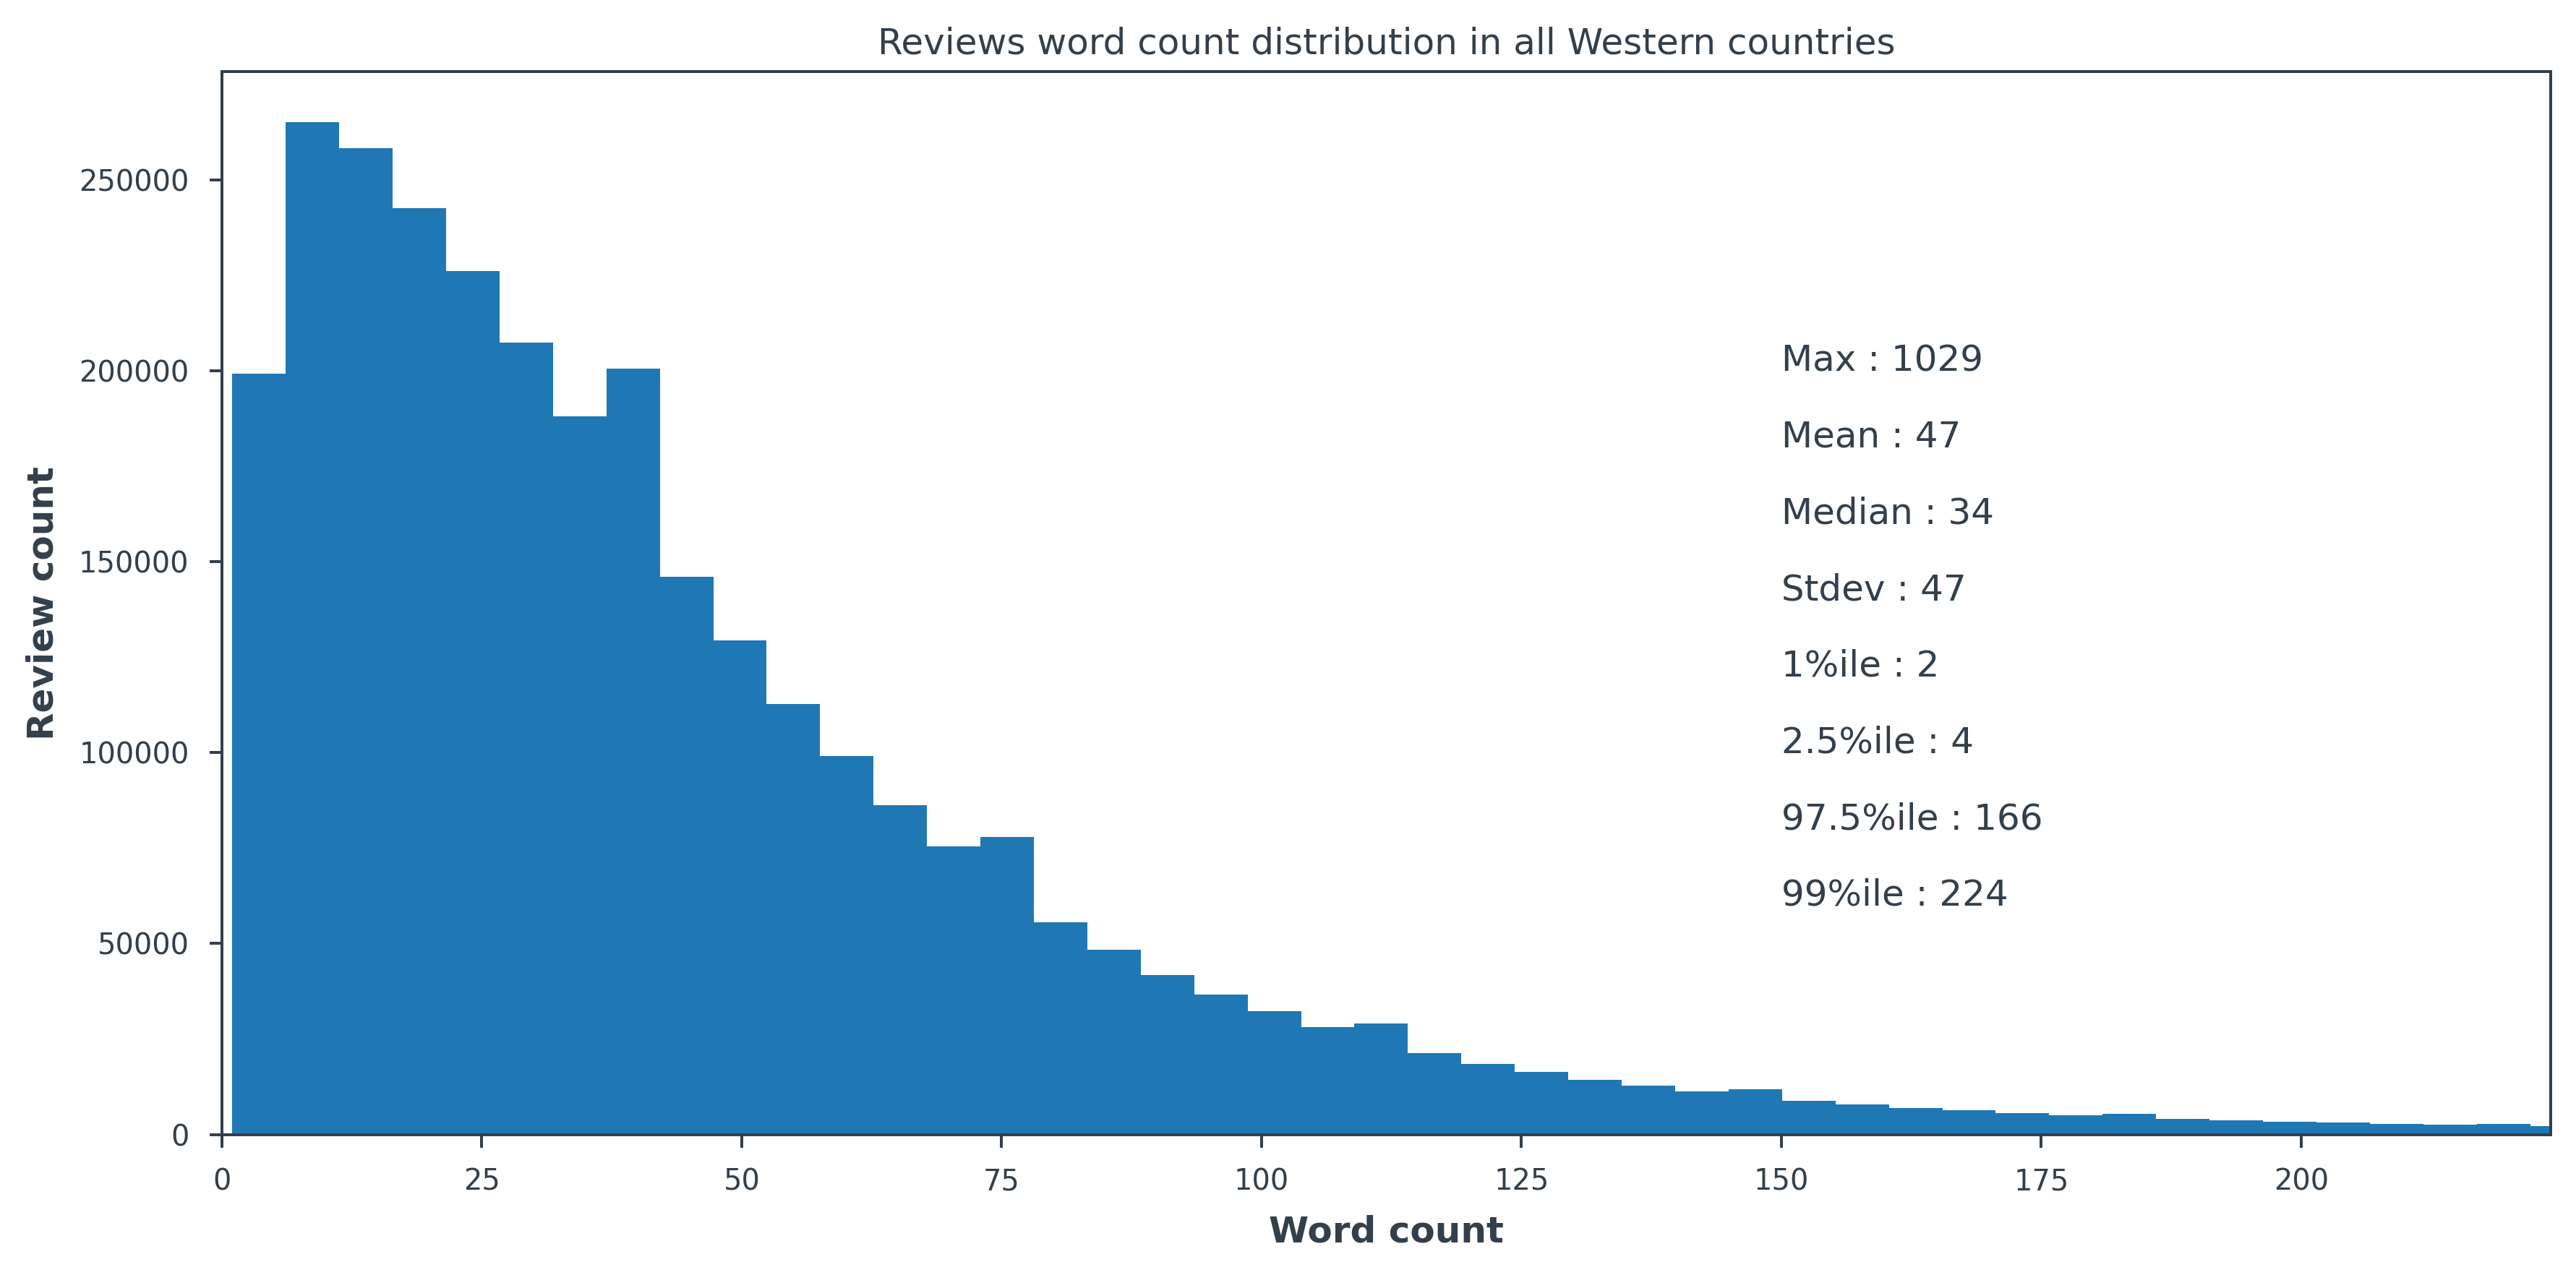

In [11]:
fig = plt.figure(figsize=(10,5))

plt.hist(western_df_english.review_word_count, bins = 200, color=color[0])

plt.text(150, 200000, 'Max : ' + str(round(np.max(western_df_english.review_word_count))))
plt.text(150, 180000, 'Mean : ' + str(round(np.mean(western_df_english.review_word_count))))
plt.text(150, 160000, 'Median : ' + str(round(np.median(western_df_english.review_word_count))))
plt.text(150, 140000, 'Stdev : ' + str(round(np.std(western_df_english.review_word_count))))
plt.text(150, 120000, '1%ile : ' + str(round(np.quantile(western_df_english.review_word_count, q=0.01))))
plt.text(150, 100000, '2.5%ile : ' + str(round(np.quantile(western_df_english.review_word_count, q=0.025))))
plt.text(150, 80000, '97.5%ile : ' + str(round(np.quantile(western_df_english.review_word_count, q=0.975))))
plt.text(150, 60000, '99%ile : ' + str(round(np.quantile(western_df_english.review_word_count, q=0.99))))


plt.gca().set(xlim=(0, np.quantile(western_df_english.review_word_count, q=0.99)))
plt.gca().yaxis.grid(False)
plt.gca().xaxis.grid(False)
plt.gca().xaxis.set_ticks(np.arange(0, np.quantile(western_df_english.review_word_count, q=0.99), 25))

plt.gca().set_ylabel('Review count', labelpad=5)
plt.gca().set_xlabel('Word count', labelpad=5)
plt.title('Reviews word count distribution in all Western countries', pad=5)

plt.tight_layout()
plt.show();

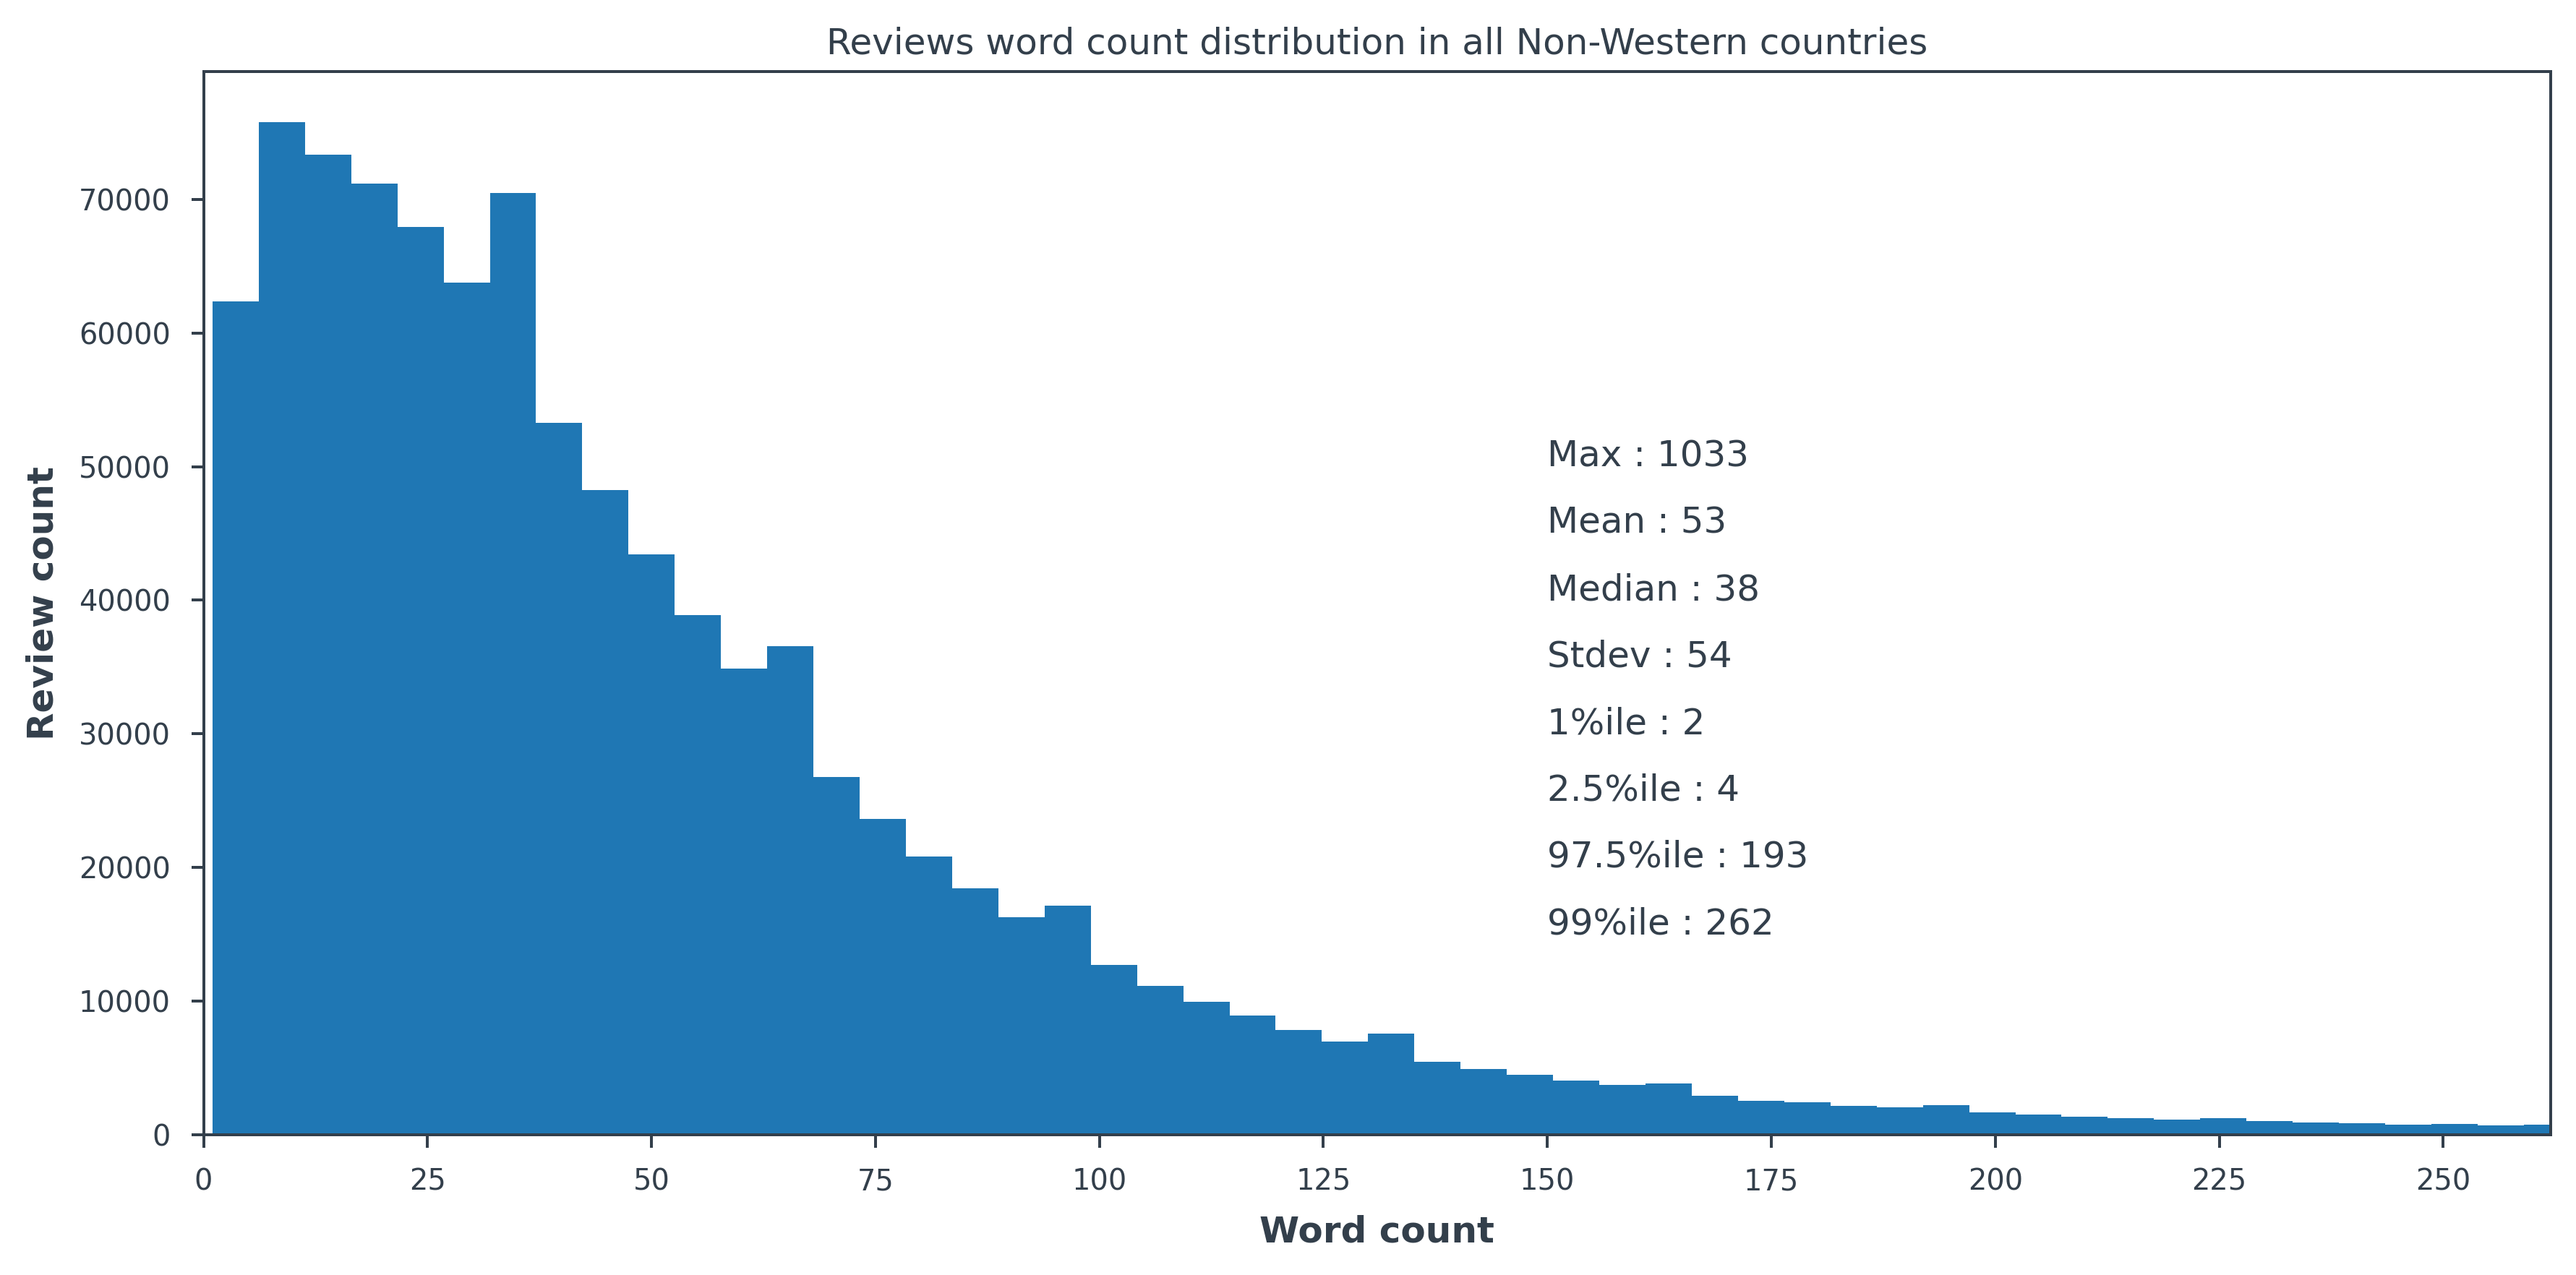

In [12]:
fig = plt.figure(figsize=(10,5))

plt.hist(non_western_df_english.review_word_count, bins = 200, color=color[0])

plt.text(150, 50000, 'Max : ' + str(round(np.max(non_western_df_english.review_word_count))))
plt.text(150, 45000, 'Mean : ' + str(round(np.mean(non_western_df_english.review_word_count))))
plt.text(150, 40000, 'Median : ' + str(round(np.median(non_western_df_english.review_word_count))))
plt.text(150, 35000, 'Stdev : ' + str(round(np.std(non_western_df_english.review_word_count))))
plt.text(150, 30000, '1%ile : ' + str(round(np.quantile(non_western_df_english.review_word_count, q=0.01))))
plt.text(150, 25000, '2.5%ile : ' + str(round(np.quantile(non_western_df_english.review_word_count, q=0.025))))
plt.text(150, 20000, '97.5%ile : ' + str(round(np.quantile(non_western_df_english.review_word_count, q=0.975))))
plt.text(150, 15000, '99%ile : ' + str(round(np.quantile(non_western_df_english.review_word_count, q=0.99))))

plt.gca().set(xlim=(0, np.quantile(non_western_df_english.review_word_count, q=0.99)))
plt.gca().yaxis.grid(False)
plt.gca().xaxis.grid(False)
plt.gca().xaxis.set_ticks(np.arange(0, np.quantile(non_western_df_english.review_word_count, q=0.99), 25))

plt.gca().set_ylabel('Review count', labelpad=5)
plt.gca().set_xlabel('Word count', labelpad=5)
plt.title('Reviews word count distribution in all Non-Western countries', pad=5)

fig.tight_layout()
plt.show();

### Plot reviews word count distribution in each city

In [13]:
def annotate(data, **kws):
    
    axes = plt.gca()
    max = np.max(data.review_word_count)
    mean = np.mean(data.review_word_count) 
    std = np.std(data.review_word_count)
    median = np.median(data.review_word_count)
    q1 = np.quantile(data.review_word_count, q=0.025)
    q2 = np.quantile(data.review_word_count, q=0.975)
    
    text = 'Max: {:.0f}'.format(max) 

    axes.annotate('Max: {:.0f}'.format(max) , xy=(0.5,0.8), xycoords='axes fraction', ha='left', fontstyle='italic')
    axes.annotate('Mean: {:.0f}'.format(mean) , xy=(0.5,0.7), xycoords='axes fraction', ha='left', fontstyle='italic')
    axes.annotate('Stdev: {:.0f}'.format(std) , xy=(0.5,0.6), xycoords='axes fraction', ha='left', fontstyle='italic')
    axes.annotate('Median: {:.0f}'.format(median) , xy=(0.5,0.5), xycoords='axes fraction', ha='left', fontstyle='italic')
    axes.annotate('2.5%ile: {:.0f}'.format(q1) , xy=(0.5,0.4), xycoords='axes fraction', ha='left', fontstyle='italic')
    axes.annotate('97.5%ile: {:.0f}'.format(q2) , xy=(0.5,0.3), xycoords='axes fraction', ha='left', fontstyle='italic')

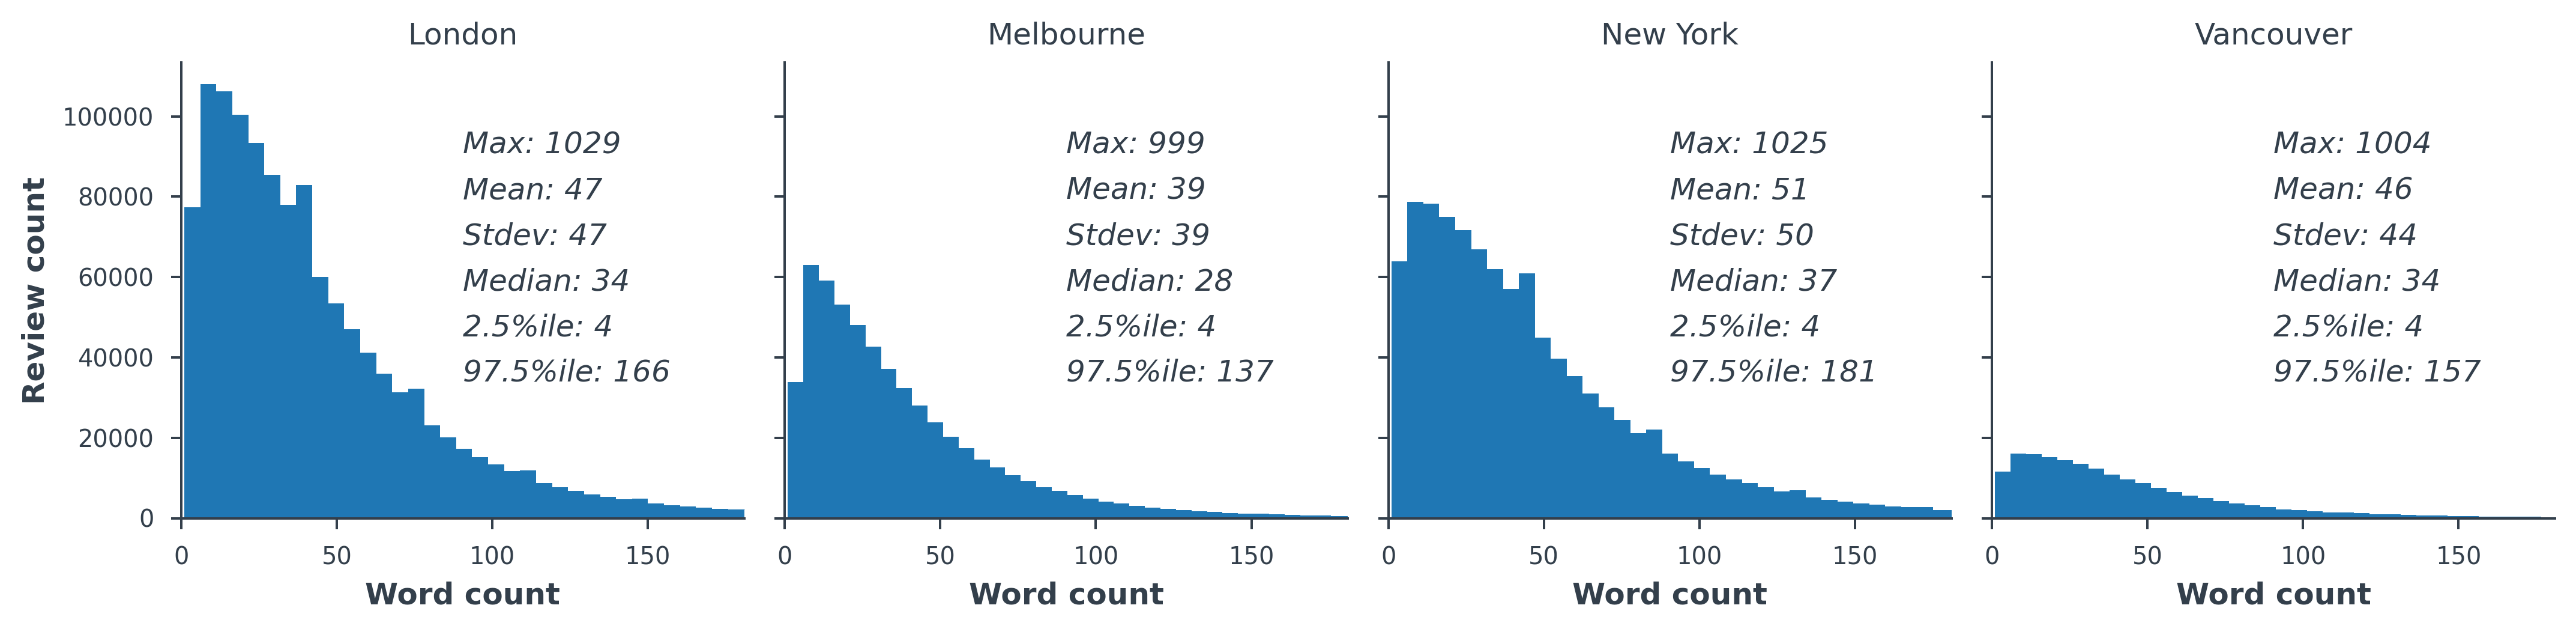

In [14]:
g = sns.FacetGrid(western_df_english, col='city', height=3, sharex=False)
g.map(plt.hist, 'review_word_count', bins=200)
g.map_dataframe(annotate)
g.set_axis_labels('Word count', 'Review count')
g.set_titles(col_template='{col_name}')
g.set(xlim=(0, western_df_english.groupby(['city'])['review_word_count'].quantile(0.975).max()))

g.fig.tight_layout(pad=1)
plt.show(g);

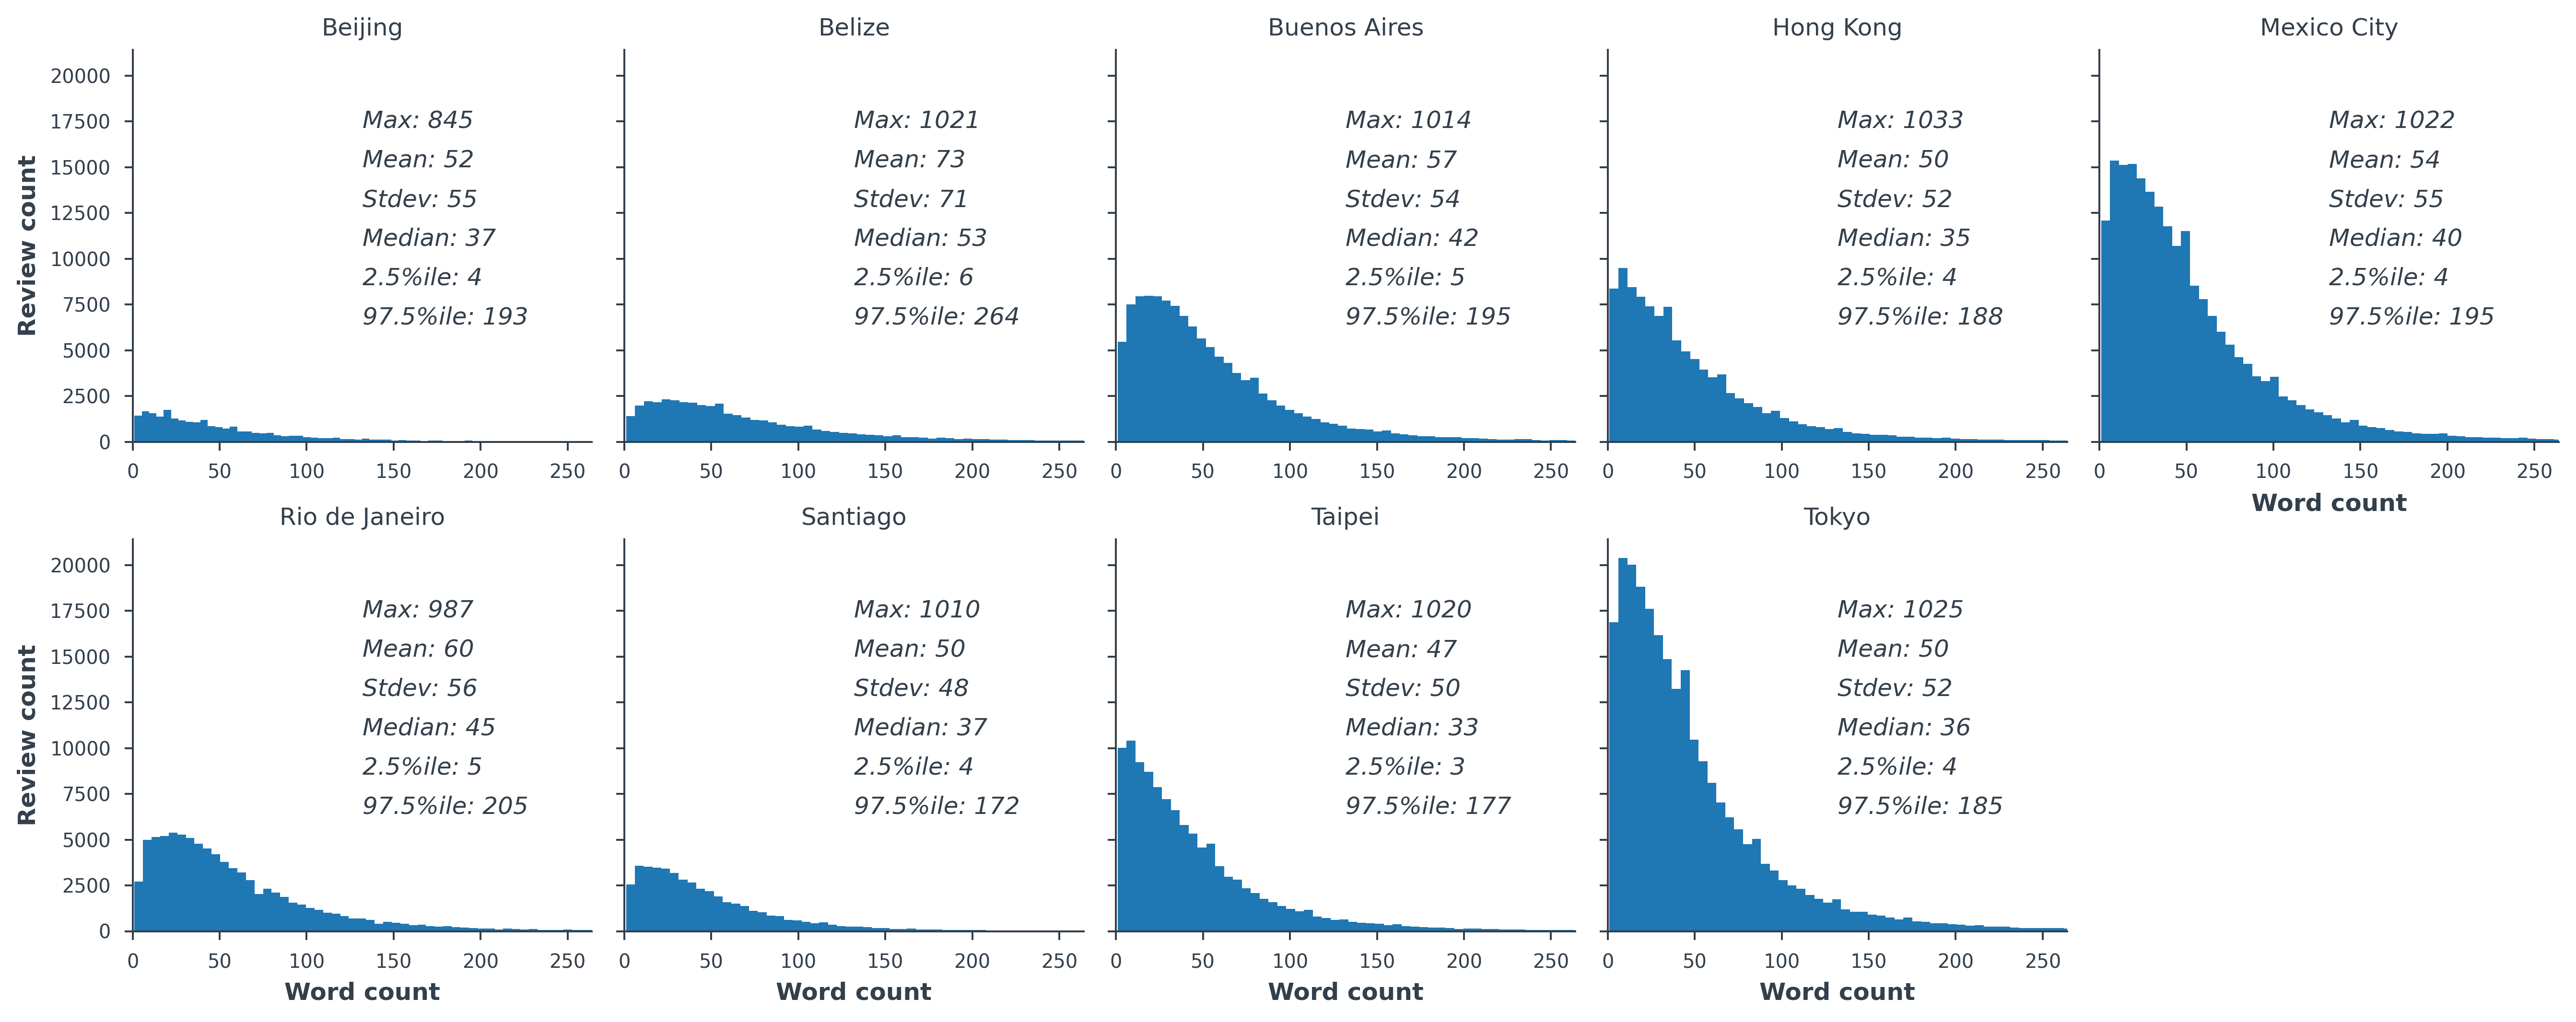

In [15]:
g = sns.FacetGrid(non_western_df_english, col='city', col_wrap=5, height=3, sharex=False)
g.map(plt.hist, 'review_word_count', bins=200)
g.map_dataframe(annotate)
g.set_axis_labels('Word count', 'Review count')
g.set_titles(col_template='{col_name}')
g.set(xlim=(0, non_western_df_english.groupby(['city'])['review_word_count'].quantile(0.975).max()))

g.fig.tight_layout(pad=1)
plt.show(g);

### Count number of reviews with 'review_word_count' below 2.5%ile and above 97.5%ile

In [16]:
print('Number of reviews with word count below 2.5%ile in Western countries: {}'.format(western_df_english.review_word_count[
                                                western_df_english['review_word_count'] < 
                                                np.quantile(western_df_english.review_word_count, q=0.025)].count()))
print('Number of reviews with word count above 97.5%ile in Western countries: {}'.format(western_df_english.review_word_count[
                                                western_df_english['review_word_count'] > 
                                                np.quantile(western_df_english.review_word_count, q=0.975)].count()))

Number of reviews with word count below 2.5%ile in Western countries: 52872
Number of reviews with word count above 97.5%ile in Western countries: 74177


In [17]:
print('Number of reviews with word count below 2.5%ile in Non-Western countries: {}'.format(non_western_df_english.review_word_count[
                                              non_western_df_english['review_word_count'] < 
                                              np.quantile(non_western_df_english.review_word_count, q=0.025)].count()))
print('Number of reviews with word count above 97.5%ile in Non-Western countries: {}'.format(non_western_df_english.review_word_count[
                                              non_western_df_english['review_word_count'] > 
                                              np.quantile(non_western_df_english.review_word_count, q=0.975)].count()))

Number of reviews with word count below 2.5%ile in Non-Western countries: 18176
Number of reviews with word count above 97.5%ile in Non-Western countries: 24696


### Extract 'year' from 'date' column

In [18]:
western_df_english['year'] = pd.DatetimeIndex(western_df_english['date']).year

In [19]:
non_western_df_english['year'] = pd.DatetimeIndex(non_western_df_english['date']).year

### Statistics for reviews word count by year

In [20]:
def q1(x):
    return x.quantile(0.01)
def q2(x):
    return x.quantile(0.025)
def q25(x):
    return x.quantile(0.25)
def q50(x):
    return x.quantile(0.50)
def q75(x):
    return x.quantile(0.75)
def q97(x):
    return x.quantile(0.975)
def q99(x):
    return x.quantile(0.99)

In [21]:
western_review_word_count_by_year = western_df_english.groupby('year')['review_word_count'].agg(['count', 
            'mean', 'median', 'std', 'min', q1, q2, q25, q50, q75, q97, q99, 'max']).fillna(0).reset_index().round()
western_review_word_count_by_year

,year,count,mean,median,std,min,q1,q2,q25,q50,q75,q97,q99,max
0,2008,1,46.0,46,0.0,46,46.0,46,46,46,46.0,46.0,46.0,46
1,2009,157,70.0,59,56.0,3,7.0,9,32,59,89.0,204.0,236.0,446
2,2010,1290,74.0,59,61.0,2,7.0,8,35,59,96.0,222.0,338.0,512
3,2011,5737,74.0,61,58.0,2,7.0,8,36,61,96.0,224.0,291.0,507
4,2012,14580,77.0,63,59.0,1,8.0,11,37,63,98.0,230.0,304.0,849
5,2013,34250,75.0,61,58.0,1,7.0,10,37,61,96.0,225.0,297.0,517
6,2014,72026,74.0,60,56.0,1,7.0,11,37,60,94.0,218.0,280.0,566
7,2015,153698,68.0,55,53.0,1,6.0,9,33,55,87.0,206.0,267.0,520
8,2016,294654,59.0,47,50.0,1,4.0,6,27,47,76.0,188.0,248.0,566
9,2017,459324,47.0,35,44.0,1,3.0,4,18,35,61.0,162.0,215.0,550


In [22]:
non_western_review_word_count_by_year = non_western_df_english.groupby('year')['review_word_count'].agg(['count', 
            'mean', 'median', 'std', 'min', q1, q2, q25, q50, q75, q97, q99, 'max']).fillna(0).reset_index().round()
non_western_review_word_count_by_year

,year,count,mean,median,std,min,q1,q2,q25,q50,q75,q97,q99,max
0,2010,81,84.0,58,80.0,13,15.0,17,30,58,124.0,287.0,359.0,462
1,2011,1039,81.0,63,66.0,2,7.0,9,38,63,106.0,257.0,341.0,500
2,2012,4285,83.0,67,66.0,1,7.0,10,40,67,105.0,260.0,335.0,703
3,2013,10037,84.0,67,67.0,1,7.0,10,41,67,106.0,264.0,345.0,511
4,2014,22328,81.0,64,65.0,1,6.0,10,38,64,103.0,258.0,336.0,514
5,2015,44379,75.0,59,62.0,1,6.0,9,35,59,96.0,240.0,313.0,512
6,2016,92282,66.0,51,57.0,1,4.0,6,28,51,85.0,218.0,288.0,523
7,2017,142165,54.0,40,52.0,1,2.0,4,21,40,70.0,191.0,255.0,522
8,2018,227547,51.0,37,51.0,1,2.0,4,18,37,66.0,184.0,249.0,1025
9,2019,355657,47.0,33,51.0,1,2.0,4,16,33,61.0,177.0,244.0,1033


### Plot reviews count by year

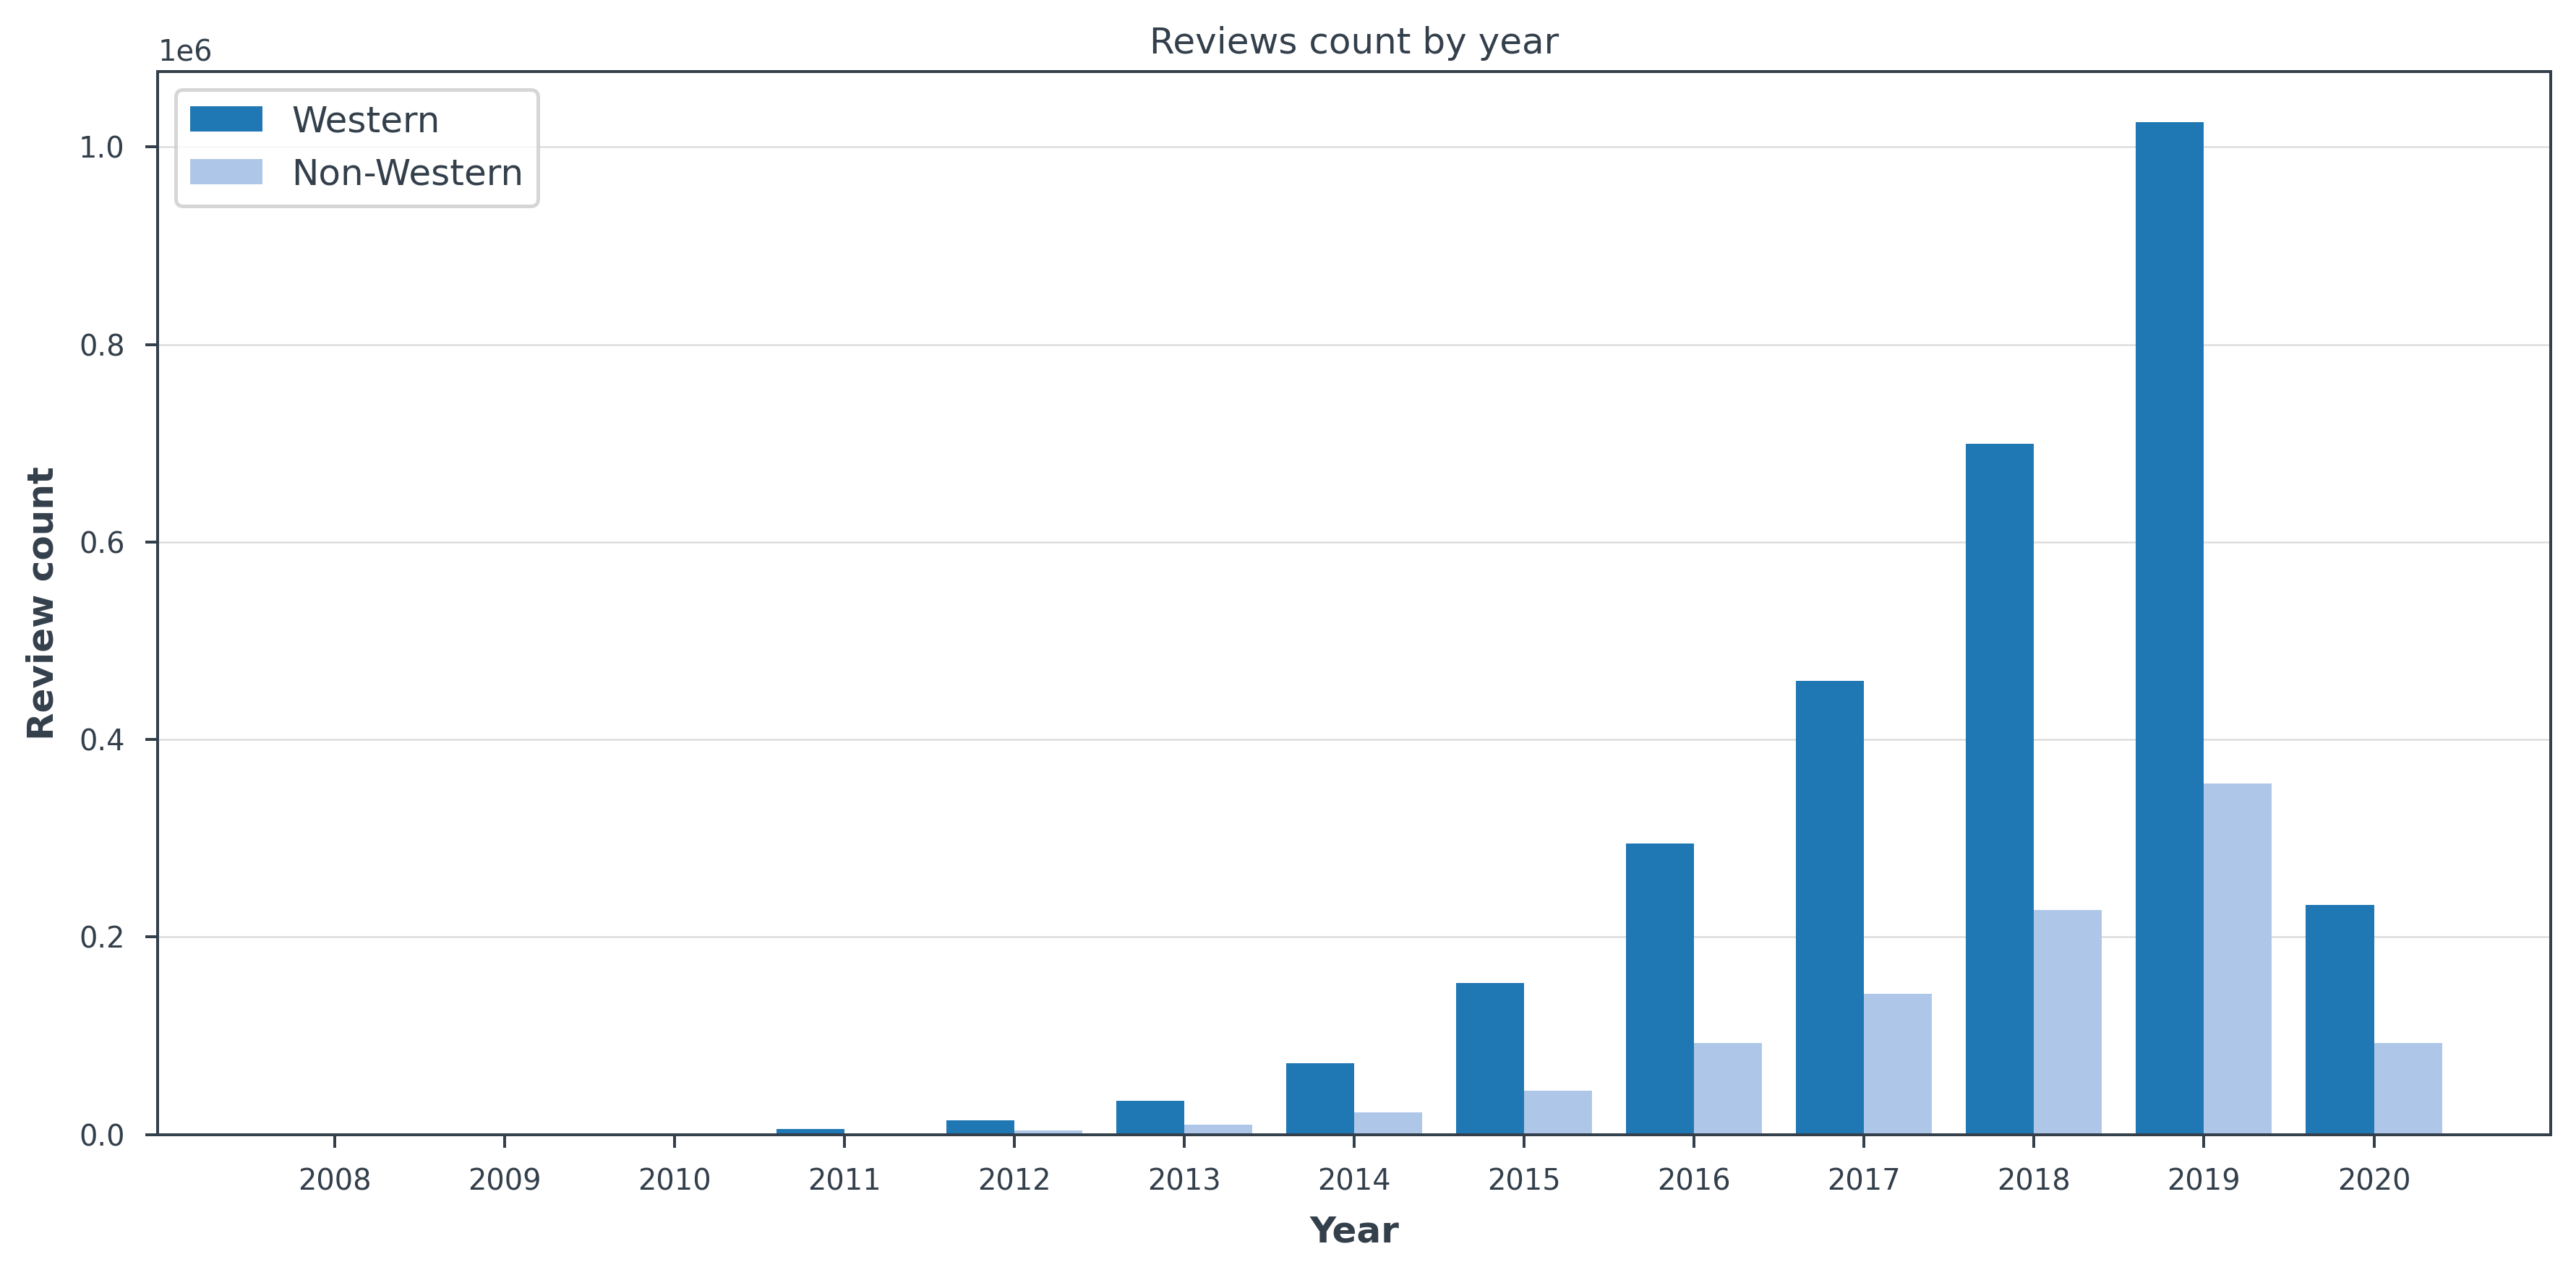

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(western_df_english.year.unique()))
bar_width = 0.4

ax.bar(x, western_df_english.groupby('year')['comments'].count(), 
       width=bar_width, label='Western', color=color[0])
ax.bar(x[2:] + bar_width, non_western_df_english.groupby('year')['comments'].count(), 
       width=bar_width, label='Non-Western', color=color[1])

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(sorted(western_df_english.year.unique()))
ax.yaxis.grid(True)

ax.legend()

ax.set_xlabel('Year', labelpad=5)
ax.set_ylabel('Review count', labelpad=5)
ax.set_title('Reviews count by year', pad=5)

fig.tight_layout()
plt.show();

---
**FINDING**

Number of reviews increases over years in both Western and Non-Western countries.

---

### Plot reviews count by city and year

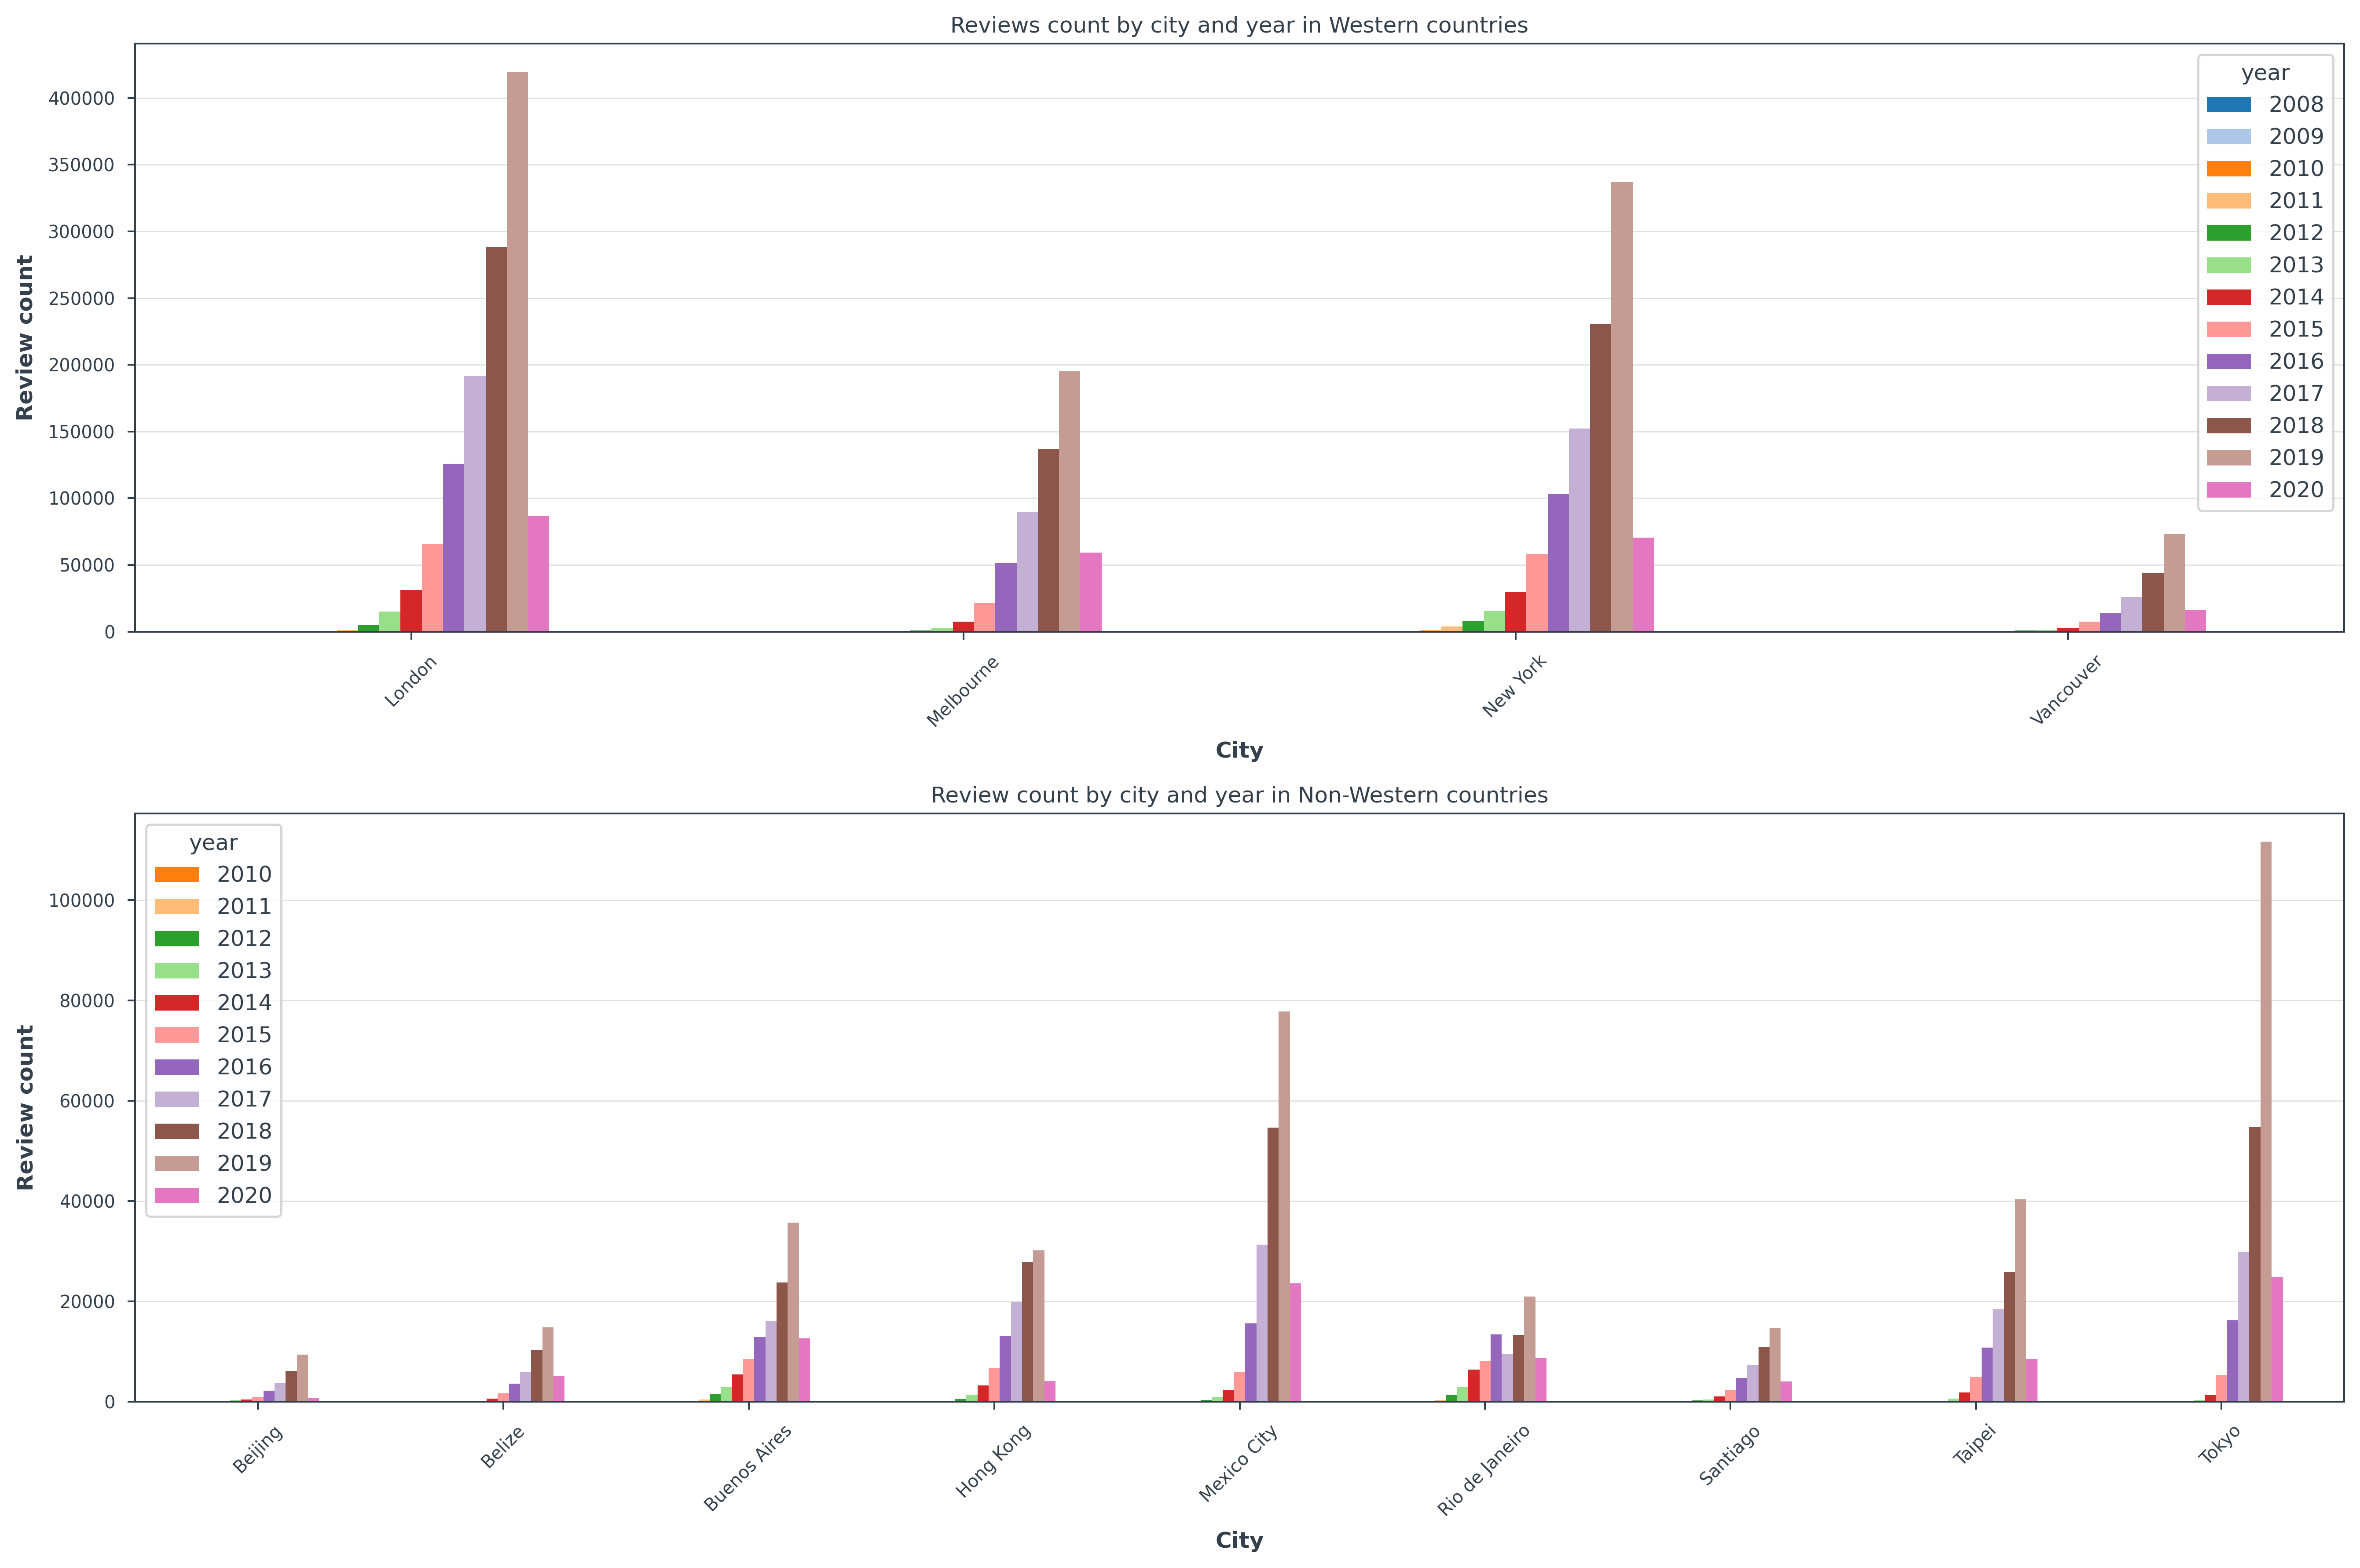

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax1 = western_df_english.groupby(['city', 'year'])['comments'].count().reset_index()\
        .pivot(index='city',columns='year',values='comments').plot(kind='bar', ax=ax[0], color=color)
ax1.set_title('Reviews count by city and year in Western countries', pad=5)
ax1.set_ylabel('Review count', labelpad=5)
ax1.set_xlabel('City', labelpad=5)
ax1.yaxis.grid(True)
ax1.xaxis.set_tick_params(rotation=45)


ax2 = non_western_df_english.groupby(['city', 'year'])['comments'].count().reset_index()\
        .pivot(index='city',columns='year',values='comments').plot(kind='bar', ax=ax[1], color=color[2:])
ax2.set_title('Review count by city and year in Non-Western countries', pad=5)
ax2.set_ylabel('Review count', labelpad=5)
ax2.set_xlabel('City', labelpad=5)
ax2.yaxis.grid(True)
ax2.xaxis.set_tick_params(rotation=45)

fig.tight_layout()
plt.show();

### Plot mean reviews word count by year with 95% confidence interval (CI)

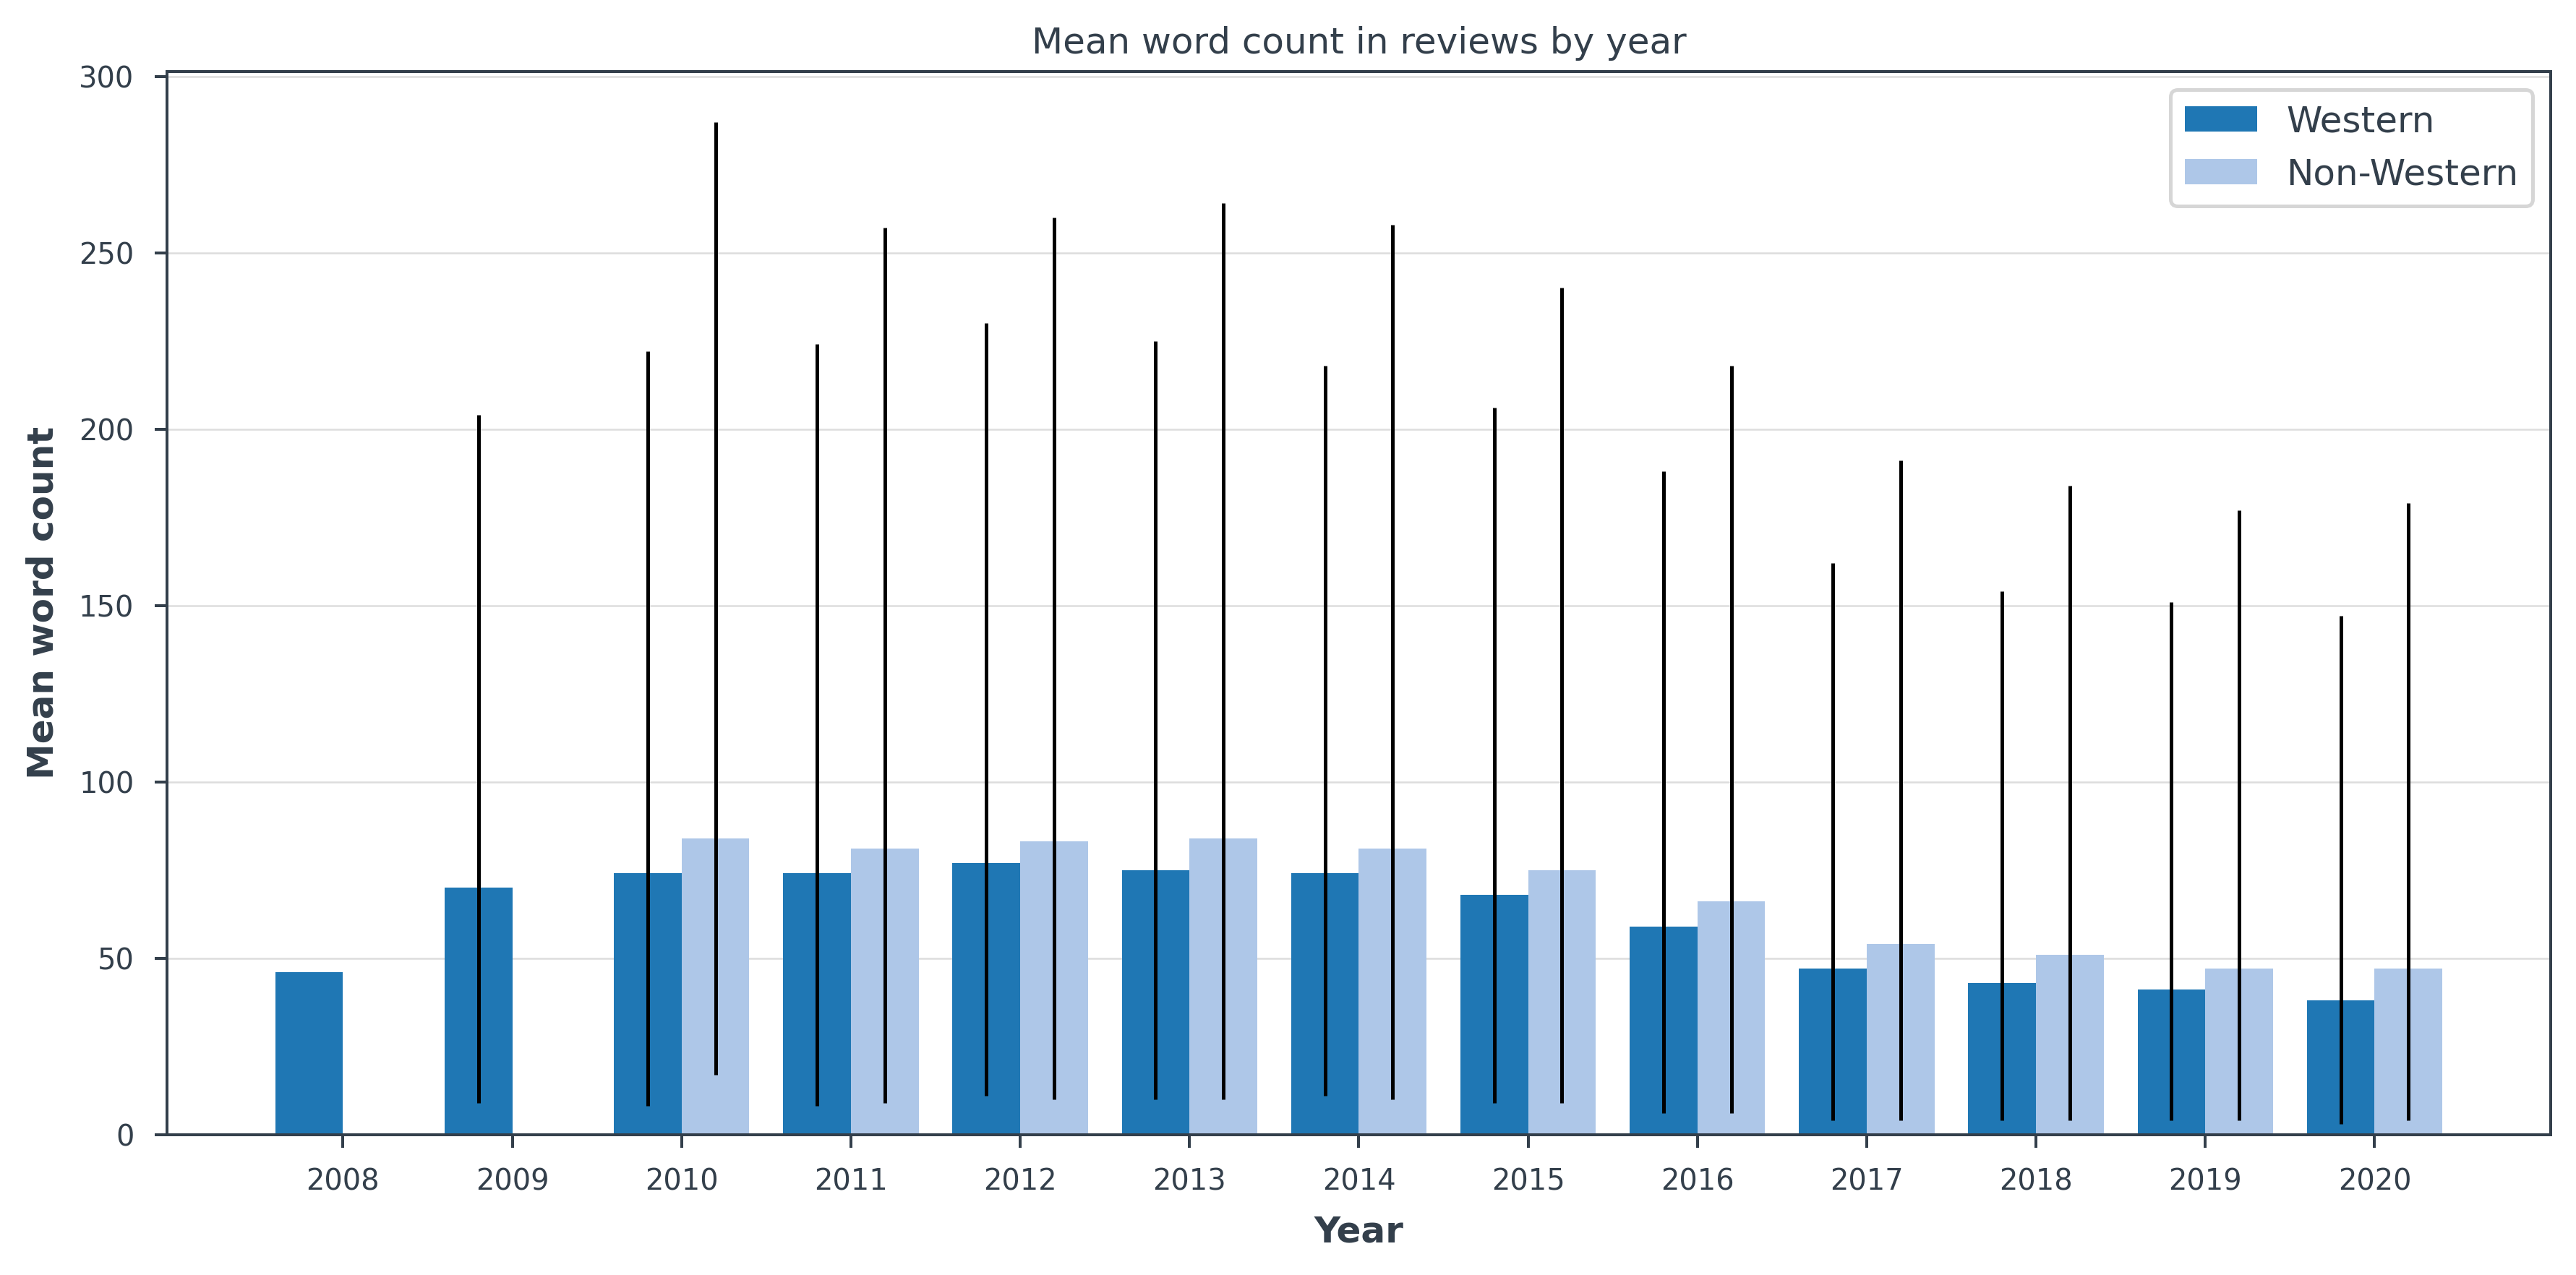

In [74]:
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(western_review_word_count_by_year.year.unique()))
bar_width = 0.4

ax.bar(x, western_review_word_count_by_year['mean'], 
       yerr=[western_review_word_count_by_year['mean'] - western_review_word_count_by_year['q2'],
            western_review_word_count_by_year['q97'] - western_review_word_count_by_year['mean']],
            width=bar_width, label='Western', color=color[0])
ax.bar(x[2:] + bar_width, non_western_review_word_count_by_year['mean'], capsize = 20,
       yerr=[non_western_review_word_count_by_year['mean'] - non_western_review_word_count_by_year['q2'],
            non_western_review_word_count_by_year['q97'] - non_western_review_word_count_by_year['mean']],
            width=bar_width, label='Non-Western', color=color[1])

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(sorted(western_review_word_count_by_year.year.unique()))
ax.yaxis.grid(True)

ax.legend()

ax.set_xlabel('Year', labelpad=5)
ax.set_ylabel('Mean word count', labelpad=5)
ax.set_title('Mean word count in reviews by year', pad=5)

fig.tight_layout()
plt.show();

---
**FINDING**

Reviews are longer on average for Non-Western countries.

---

---
**FINDING**

Review length decreases over years for both Wester and Non-Western countries.

---

### Statistics reviews word count by city

In [61]:
western_review_word_count_by_city = western_df_english.groupby('city')['review_word_count'].agg(['count', 
            'mean', 'median', 'std', 'min', q1, q2, q25, q50, q75, q97, q99, 'max']).fillna(0).reset_index().round()
western_review_word_count_by_city

,city,count,mean,median,std,min,q1,q2,q25,q50,q75,q97,q99,max
0,London,1230459,47.0,34,47.0,1,2,4,17,34,61,166,224,1029
1,Melbourne,565265,39.0,28,39.0,1,2,4,14,28,51,137,183,999
2,New York,1010634,51.0,37,50.0,1,2,4,19,37,66,181,243,1025
3,Vancouver,186474,46.0,34,44.0,1,2,4,18,34,60,157,211,1004


In [62]:
non_western_review_word_count_by_city = non_western_df_english.groupby('city')['review_word_count'].agg(['count', 
            'mean', 'median', 'std', 'min', q1, q2, q25, q50, q75, q97, q99, 'max']).fillna(0).reset_index().round()
non_western_review_word_count_by_city

,city,count,mean,median,std,min,q1,q2,q25,q50,q75,q97,q99,max
0,Beijing,23819,52.0,37,55.0,1,2,4,17,37,68,193,259.0,845
1,Belize,42259,73.0,53,71.0,1,4,6,28,53,94,264,359.0,1021
2,Buenos Aires,119920,57.0,42,54.0,1,3,5,22,42,73,195,261.0,1014
3,Hong Kong,106959,50.0,35,52.0,1,2,4,17,35,65,188,255.0,1033
4,Mexico City,212304,54.0,40,55.0,1,2,4,20,40,70,195,265.0,1022
5,Rio de Janeiro,85188,60.0,45,56.0,1,3,5,24,45,77,205,275.0,987
6,Santiago,45762,50.0,37,48.0,1,2,4,19,37,65,172,230.0,1010
7,Taipei,111189,47.0,33,50.0,1,2,3,15,33,61,177,241.0,1020
8,Tokyo,244654,50.0,36,52.0,1,2,4,18,36,65,185,251.0,1025


### Plot mean reviews word count by city with 95% confidence interval (CI)

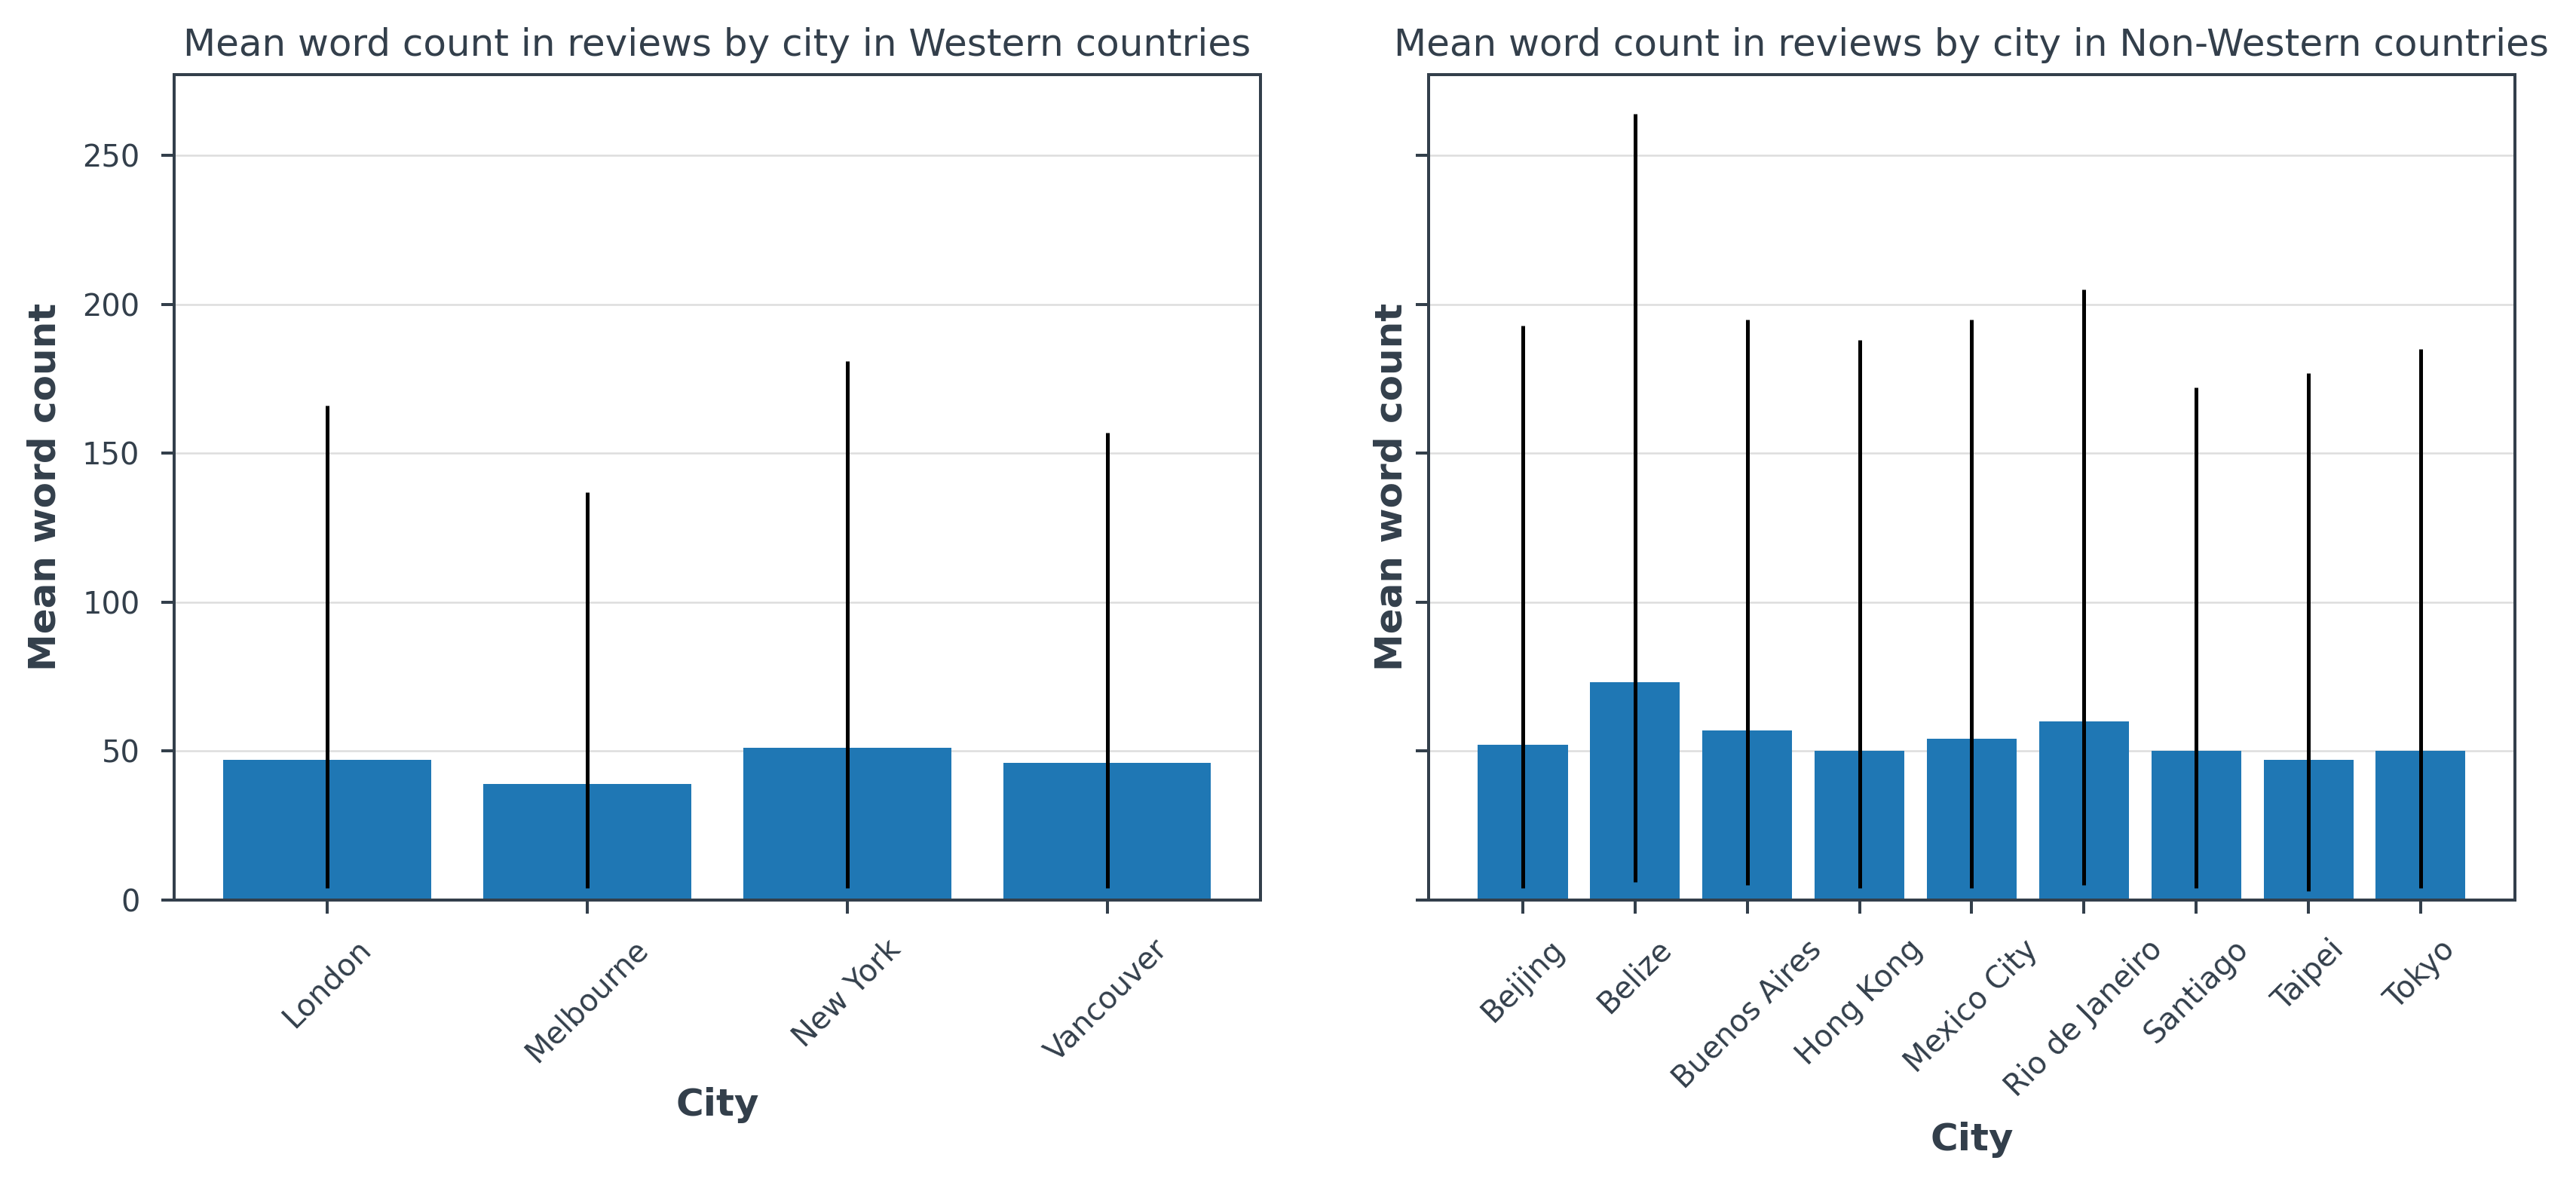

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True, constrained_layout=True)

ax[0].bar(western_review_word_count_by_city.city, western_review_word_count_by_city['mean'], 
       yerr=[western_review_word_count_by_city['mean'] - western_review_word_count_by_city['q2'],
            western_review_word_count_by_city['q97'] - western_review_word_count_by_city['mean']], color=color[0])
ax[1].bar(non_western_review_word_count_by_city.city, non_western_review_word_count_by_city['mean'], 
       yerr=[non_western_review_word_count_by_city['mean'] - non_western_review_word_count_by_city['q2'],
            non_western_review_word_count_by_city['q97'] - non_western_review_word_count_by_city['mean']], color=color[0])

ax[0].yaxis.grid(True)
ax[0].xaxis.set_tick_params(rotation=45)
ax[0].set_xlabel('City', labelpad=5)
ax[0].set_ylabel('Mean word count', labelpad=5)
ax[0].set_title('Mean word count in reviews by city in Western countries', pad=5)

ax[1].yaxis.grid(True)
ax[1].xaxis.set_tick_params(rotation=45)
ax[1].set_xlabel('City', labelpad=5)
ax[1].set_ylabel('Mean word count', labelpad=5)
ax[1].set_title('Mean word count in reviews by city in Non-Western countries', pad=5)

fig.tight_layout(pad=3)
plt.show();

### Statistics reviews word count by city and year

In [65]:
western_review_word_count_by_city_year = western_df_english.groupby(['city', 'year'])['review_word_count'].agg(['count',
            'mean', 'median', 'std', 'min', q1, q2, q25, q50, q75, q97, q99, 'max']).fillna(0).reset_index().round()
western_review_word_count_by_city_year['error_b'] = western_review_word_count_by_city_year['mean'] - western_review_word_count_by_city_year['q2']

western_review_word_count_by_city_year['error_t'] = western_review_word_count_by_city_year['q97'] - western_review_word_count_by_city_year['mean']
western_review_word_count_by_city_year['error'] = (western_review_word_count_by_city_year['error_t'] - western_review_word_count_by_city_year['error_b'])/2
western_review_word_count_by_city_year

,city,year,count,mean,median,std,min,q1,q2,q25,q50,q75,q97,q99,max,error_b,error_t,error
0,London,2009,1,35.0,35,0.0,35,35.0,35.0,35.0,35,35.0,35.0,35.0,35,0.0,0.0,0.0
1,London,2010,159,78.0,61,62.0,5,6.0,9.0,34.0,61,105.0,243.0,296.0,313,69.0,165.0,48.0
2,London,2011,1229,74.0,60,59.0,4,6.0,8.0,36.0,60,94.0,226.0,310.0,495,66.0,152.0,43.0
3,London,2012,5074,72.0,59,56.0,1,7.0,10.0,34.0,59,93.0,209.0,282.0,800,62.0,137.0,37.5
4,London,2013,14998,73.0,59,57.0,1,7.0,10.0,36.0,59,93.0,221.0,296.0,508,63.0,148.0,42.5
5,London,2014,31377,71.0,58,54.0,1,7.0,10.0,35.0,58,91.0,213.0,271.0,507,61.0,142.0,40.5
6,London,2015,65965,66.0,54,52.0,1,6.0,9.0,32.0,54,85.0,200.0,258.0,520,57.0,134.0,38.5
7,London,2016,126017,58.0,46,49.0,1,4.0,6.0,26.0,46,75.0,184.0,242.0,524,52.0,126.0,37.0
8,London,2017,191357,47.0,35,45.0,1,3.0,4.0,18.0,35,61.0,162.0,216.0,550,43.0,115.0,36.0
9,London,2018,287977,44.0,32,44.0,1,2.0,4.0,16.0,32,57.0,154.0,209.0,1029,40.0,110.0,35.0


In [66]:
non_western_review_word_count_by_city_year = non_western_df_english.groupby(['city', 'year'])['review_word_count'].agg(['count',
            'mean', 'median', 'std', 'min', q1, q2, q25, q50, q75, q97, q99, 'max']).fillna(0).reset_index().round()
non_western_review_word_count_by_city_year['error_b'] = non_western_review_word_count_by_city_year['mean'] - non_western_review_word_count_by_city_year['q2']

non_western_review_word_count_by_city_year['error_t'] = non_western_review_word_count_by_city_year['q97'] - non_western_review_word_count_by_city_year['mean']
non_western_review_word_count_by_city_year['error'] = (non_western_review_word_count_by_city_year['error_t'] - non_western_review_word_count_by_city_year['error_b'])/2
non_western_review_word_count_by_city_year

,city,year,count,mean,median,std,min,q1,q2,q25,q50,q75,q97,q99,max,error_b,error_t,error
0,Beijing,2010,2,96.0,96.0,83.0,38,39.0,41.0,67.0,96.0,126.0,152.0,154.0,155,55.0,56.0,0.5
1,Beijing,2011,24,128.0,114.0,70.0,22,22.0,23.0,75.0,114.0,173.0,260.0,263.0,265,105.0,132.0,13.5
2,Beijing,2012,113,99.0,73.0,83.0,2,12.0,20.0,46.0,73.0,111.0,303.0,363.0,496,79.0,204.0,62.5
3,Beijing,2013,283,88.0,70.0,64.0,6,10.0,13.0,42.0,70.0,116.0,256.0,261.0,427,75.0,168.0,46.5
4,Beijing,2014,446,87.0,70.0,64.0,4,6.0,8.0,43.0,70.0,112.0,254.0,308.0,399,79.0,167.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Tokyo,2016,16213,68.0,52.0,58.0,1,4.0,7.0,29.0,52.0,87.0,223.0,292.0,514,61.0,155.0,47.0
92,Tokyo,2017,29937,54.0,40.0,51.0,1,3.0,4.0,21.0,40.0,69.0,187.0,252.0,522,50.0,133.0,41.5
93,Tokyo,2018,54836,50.0,36.0,51.0,1,2.0,4.0,18.0,36.0,65.0,180.0,242.0,1025,46.0,130.0,42.0
94,Tokyo,2019,111740,46.0,32.0,50.0,1,2.0,4.0,16.0,32.0,59.0,176.0,240.0,1021,42.0,130.0,44.0


### Plot mean reviews word count by city and year with 95% confidence interval (CI)

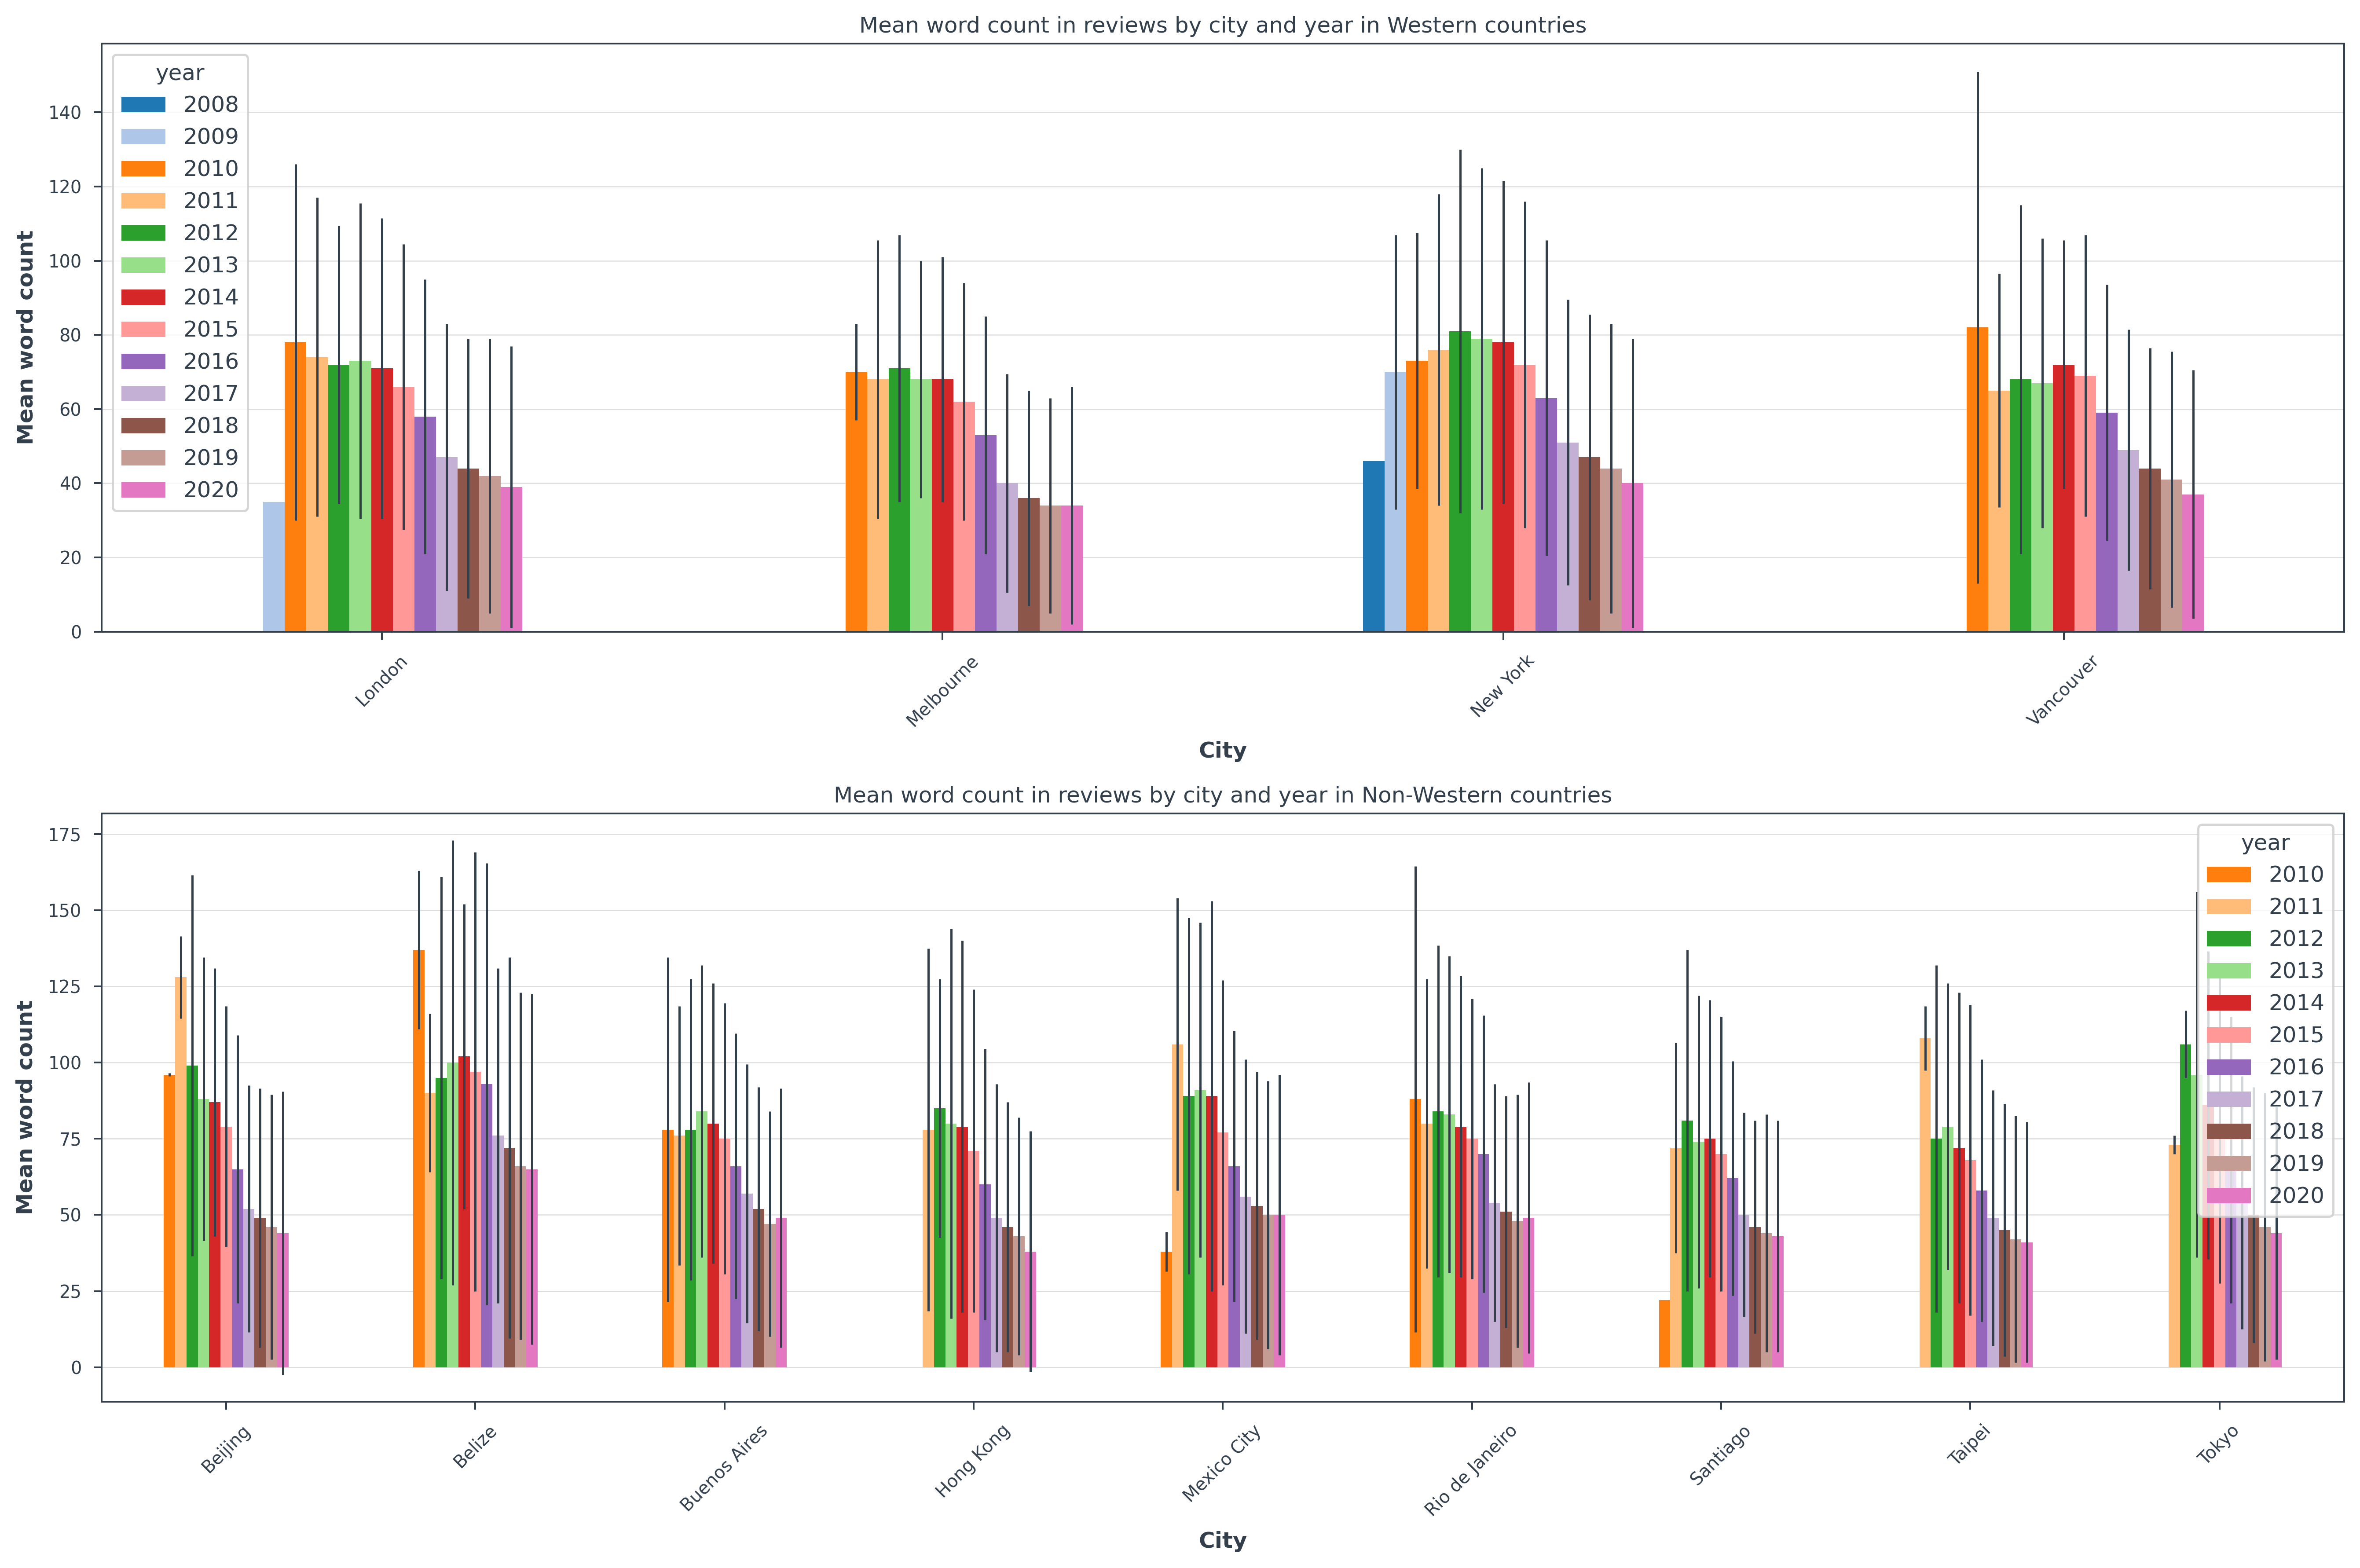

In [68]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax1 = western_review_word_count_by_city_year.pivot(index='city',columns='year',values='mean').plot(kind='bar', ax=ax[0], color=color,
        yerr=western_review_word_count_by_city_year.pivot(index='city',columns='year',values='error'))
ax1.set_title('Mean word count in reviews by city and year in Western countries', pad=5)
ax1.set_ylabel('Mean word count', labelpad=5)
ax1.set_xlabel('City', labelpad=5)
ax1.yaxis.grid(True)
ax1.xaxis.set_tick_params(rotation=45)


ax2 = non_western_review_word_count_by_city_year.pivot(index='city',columns='year',values='mean').plot(kind='bar', ax=ax[1], color=color[2:],
        yerr=non_western_review_word_count_by_city_year.pivot(index='city',columns='year',values='error'))
ax2.set_title('Mean word count in reviews by city and year in Non-Western countries', pad=5)
ax2.set_ylabel('Mean word count', labelpad=5)
ax2.set_xlabel('City', labelpad=5)
ax2.yaxis.grid(True)
ax2.xaxis.set_tick_params(rotation=45)

fig.tight_layout()
plt.show();

### List of comments with word count between 4 and 8

In [27]:
non_western_df_english.comments_cleaned[(non_western_df_english['review_word_count'] <= 8) & 
                                        (non_western_df_english['review_word_count'] >= 4)].tolist()

['had a great time living in this department',
 'very satisfied. Recommended to everyone',
 'Great Host. Nice room with wonderful view',
 'experience like everything was gorgeous',
 'Interesting experience has learned a lot',
 'Great place and great hosts. Would stay again',
 'Great location and super friendly host',
 'Cindy is very attentive and helpful',
 'Cheap and clean apartment. Good location',
 'Nice place in the center of Beijing',
 'The apartment is very well located',
 'It was nice clean and good loacation',
 'Disappointed dirty not even in an acceptable condition',
 'Great place in convenient location',
 'Vera is kind and the experience is excellent',
 'Great communication very helpful host. Highly recommend',
 'Very good location and amendment. Thanks for hospitality',
 'Very easy to receive instructions from. Lovely house',
 'Great Host. Will come back',
 'We made it to chicago',
 'Great host and cat',
 'Great experience. Great location n helpful host',
 'Nice house lovely

### Count number of reviews with 'review_word_count' below 8 words

In [28]:
print('Number of reviews containing less than 8 words in Western countries: {}'.format(western_df_english.review_word_count[
                                                            western_df_english['review_word_count'] < 8].count()))

Number of reviews containing less than 8 words in Western countries: 251276


In [29]:
print('Number of reviews containing less than 8 words in Non-Western countries: {}'.format(non_western_df_english.review_word_count[
                                                            non_western_df_english['review_word_count'] < 8].count()))

Number of reviews containing less than 8 words in Non-Western countries: 77416


### Remove too short (<8 words) and too long reviews (>97.5%ile)

In [30]:
western_df_english_final = western_df_english[(western_df_english['review_word_count'] > 7) & 
                                            (western_df_english['review_word_count'] <= 
                                            int(round(np.quantile(western_df_english.review_word_count, q=0.975))))]

In [31]:
western_total_number_english_reviews = western_df_english.shape[0]
western_total_number_english_reviews_without_short_long = western_df_english_final.shape[0]
print('Total number of English reviews in Western countries: {}'.format(western_total_number_english_reviews))
print('Total number of English reviews after removing too short and too long reviews: {}'.format(
                                                            western_total_number_english_reviews_without_short_long))
print('Percentage of reviews left: {:.0%}'.format(western_total_number_english_reviews_without_short_long/
                                                            western_total_number_english_reviews))

Total number of English reviews in Western countries: 2992832
Total number of English reviews after removing too short and too long reviews: 2667379
Percentage of reviews left: 89%


In [32]:
non_western_df_english_final = non_western_df_english[(non_western_df_english['review_word_count'] > 7) & 
                                        (non_western_df_english['review_word_count'] <= 
                                         int(round(np.quantile(non_western_df_english.review_word_count, q=0.975))))]

In [33]:
non_western_total_number_english_reviews = non_western_df_english.shape[0]
non_western_total_number_english_reviews_without_short_long = non_western_df_english_final.shape[0]
print('Total number of English reviews in Non-Western countries: {}'.format(non_western_total_number_english_reviews))
print('Total number of English reviews after removing too short and too long reviews: {}'.format(
                                                        non_western_total_number_english_reviews_without_short_long))
print('Percentage of reviews left: {:.0%}'.format(non_western_total_number_english_reviews_without_short_long/
                                                        non_western_total_number_english_reviews))

Total number of English reviews in Non-Western countries: 992054
Total number of English reviews after removing too short and too long reviews: 889942
Percentage of reviews left: 90%


---
**Question?** 

Is it ok to choose two different 97.5%iles for each data set accordingly or it is better to pick the same value (for example mean 97.5%ile) for both data sets?

---

In [34]:
western_df_english_final.to_pickle('western_df_english_cleaned_final.pkl')

In [35]:
non_western_df_english_final.to_pickle('non_western_df_english_cleaned_final.pkl')